In [6]:
# 1. Show Linear speedup on ring graph; grid graph and exp graph (synthetic, MNIST, CIFAR) in total 9 plots
# 3种拓扑, 3种数据集(对应了3种模型)
# 2. Show the influence of 6 topologies (CIFAR-10)
# 6种拓扑上的对比

In [ ]:
# 脚本文件: /home/lg/ICML2025_project/scripts_pushpull copy/run_push_pull_track_grad_norm.py

In [8]:
# 首先解决一下不同n下最后一个batch的问题

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

def prettyshow(grads, legend, save='image.pdf', ylabel='Gradient Norm'):
    plt.rcParams['figure.figsize'] = 12, 8
    
    plt.figure()
    xlen = len(grads[0])
    colors = ['green', 'red', 'blue', 'orange', 'purple', 'brown']
    markers = ['d', '^', 'o', '<', '*', 's']
    idx_set = np.arange(0, xlen, xlen//10)
    
    for i in range(len(grads)):
        plt.semilogy(0, grads[i][0], color=colors[i], marker=markers[i], markersize=8)
    
    for i in range(len(grads)):
        for idx in idx_set:
            plt.semilogy(idx, grads[i][idx], color=colors[i], marker=markers[i], markersize=15, linestyle='None')
    
    for i in range(len(grads)):
        plt.semilogy(np.arange(xlen), grads[i], linewidth=4, color=colors[i])
    
    # 设置图例为2行3列，并放置在右上角
    plt.legend(legend, prop={'size': 30, 'weight': 'bold'}, loc='upper left', 
               bbox_to_anchor=(0.03, 1), ncol=2)
    
    plt.xlabel('Comm. Rounds', fontsize=47, fontweight='bold')
    plt.ylabel(ylabel, fontsize=47, fontweight='bold')
    
    # 设置科学记数法格式
    ax = plt.gca()
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    formatter.set_powerlimits((3, 6))  # 当数值超过1e3或1e6时使用科学记数法
    ax.xaxis.set_major_formatter(formatter)
    
    # 自定义x_tick显示，将数值除以100
    def format_x_tick(x, pos):
        return f'{x*1.0:.0f}'
    
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_x_tick))
    
    # 调整刻度数量和间隔
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    
    # 设置刻度标签和偏移文本的字体
    plt.xticks(fontsize=35, fontweight='bold')
    plt.yticks(fontsize=35, fontweight='bold')
    ax.xaxis.get_offset_text().set_fontsize(25)  # 调整科学记数法指数字体大小
    ax.xaxis.get_offset_text().set_fontweight('bold')
    plt.title("Geometric", fontsize=47, fontweight='bold')
    
    plt.grid(True)
    plt.subplots_adjust(left=0.21, bottom=0.15, right=0.75)  # 调整右侧边距以容纳图例
    plt.savefig(save, bbox_inches='tight')
    plt.show()

### Case Study

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

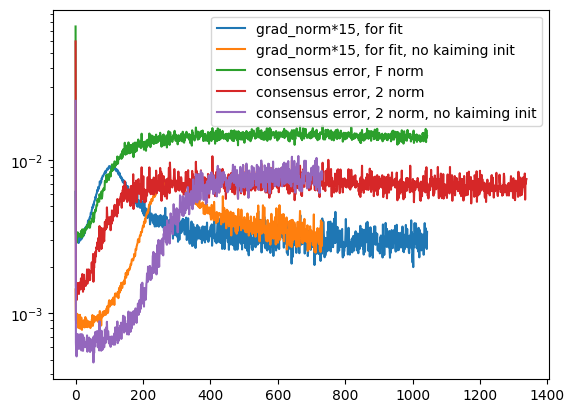

In [120]:
df = pd.read_csv("./case_study_use_exp/consensus/exp(n=16),异质性分布hetero=True, alpha=0.9, PushPull, lr=0.002, n_nodes=16, batch_size=128, 2025-06-03.csv")
df2 = pd.read_csv("./case_study_use_exp/consensus/exp(n=16),异质性分布_2_normhetero=True, alpha=0.9, PushPull, lr=0.002, n_nodes=16, batch_size=128, 2025-06-03.csv")
df3 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/case_study_use_exp/consensus/如果不用kaiming初始化exp(n=16),异质性分布_2_normhetero=True, alpha=0.9, PushPull, lr=0.002, n_nodes=16, batch_size=128, 2025-06-03.csv")

a = 0

plt.plot(df["grad_norm_per_epoch"][a:]*15, label="grad_norm*15, for fit")
plt.plot(df3["grad_norm_per_epoch"][a:]*15, label="grad_norm*15, for fit, no kaiming init")
plt.plot(df["consensus_per_epoch"][a:], label="consensus error, F norm")
plt.plot(df2["consensus_per_epoch"][a:], label="consensus error, 2 norm")
plt.plot(df3["consensus_per_epoch"][a:], label="consensus error, 2 norm, no kaiming init")
plt.yscale('log')
plt.legend()
plt.show()
# plt.plot(df["grad_norm_per_epoch"][a:], label="grad_norm")
# plt.yscale('log')
# plt.legend()
# plt.show()


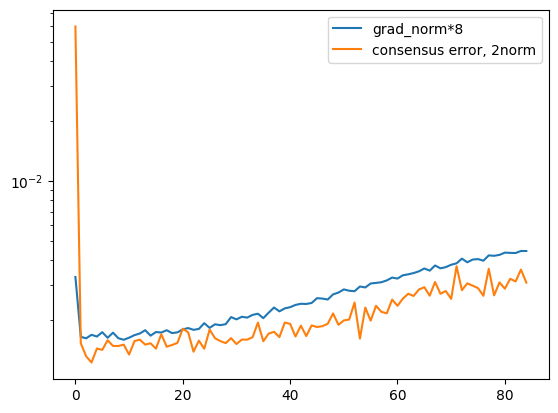

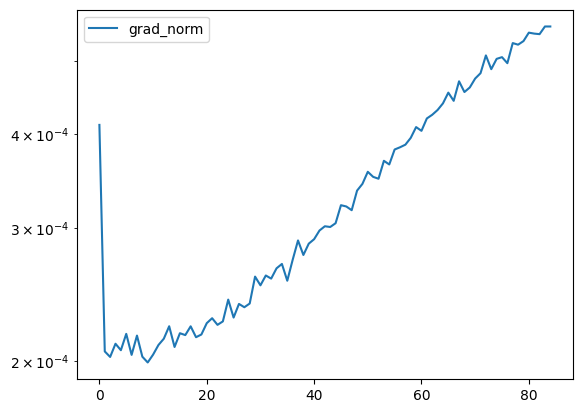

In [70]:
df = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/case_study_use_exp/consensus/exp(n=16),异质性分布_2_normhetero=True, alpha=0.9, PushPull, lr=0.002, n_nodes=16, batch_size=128, 2025-06-03.csv")

a = 0

plt.plot(df["grad_norm_per_epoch"][a:]*8, label="grad_norm*8")
plt.plot(df["consensus_per_epoch"][a:], label="consensus error, 2norm")
plt.yscale('log')
plt.legend()
plt.show()
plt.plot(df["grad_norm_per_epoch"][a:], label="grad_norm")
plt.yscale('log')
plt.legend()
plt.show()

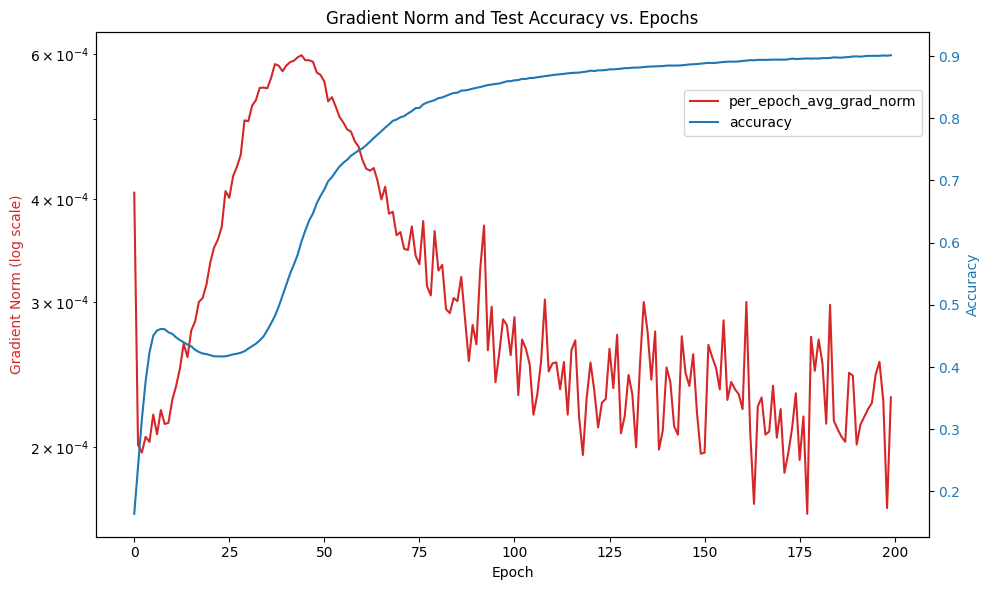

In [56]:
df = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/case_study_use_exp/newhetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=16, batch_size=128, 2025-05-17.csv")

# plt.plot(df1['grad_norm_per_epoch'], label='per_epoch_avg_grad_norm')
# plt.yscale('log')
# plt.legend()
# plt.show()

# plt.plot(df1['test_accuracy(average)'], label='accuracy')
# plt.legend()
# plt.show()

df1 = df[:200]


x_axis = df1.index # 或者您的 epoch 列
# --- 示例数据结束 ---


# 创建图形和第一个y轴 (ax1 for grad_norm)
fig, ax1 = plt.subplots(figsize=(10, 6)) # 可以调整图形大小

# 设置第一个y轴 (grad_norm)
color1 = 'tab:red' # 或者直接 'red'
ax1.set_xlabel('Epoch') # 或者您横轴的实际含义
ax1.set_ylabel('Gradient Norm (log scale)', color=color1)
line1 = ax1.plot(x_axis, df1['grad_norm_per_epoch'], color=color1, label='per_epoch_avg_grad_norm')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_yscale('log') # 设置grad_norm的y轴为对数刻度

# 创建共享x轴的第二个y轴 (ax2 for accuracy)
ax2 = ax1.twinx()
color2 = 'tab:blue' # 或者直接 'blue'
ax2.set_ylabel('Accuracy', color=color2)
line2 = ax2.plot(x_axis, df1['test_accuracy(average)'], color=color2, label='accuracy')
ax2.tick_params(axis='y', labelcolor=color2)
# accuracy 的 y 轴默认是线性刻度，不需要额外设置

# 添加图例
# 为了将两个图例合并，我们需要获取它们的句柄和标签
lines = line1 + line2
labels = [l.get_label() for l in lines]
# ax1.legend(lines, labels, loc='best') # 'best' 会自动选择最佳位置
# 或者更精确地控制图例位置，例如：
ax1.legend(lines, labels, loc='upper right', bbox_to_anchor=(1, 0.9))


# 添加标题
plt.title('Gradient Norm and Test Accuracy vs. Epochs')

# 调整布局以防止标签重叠
fig.tight_layout()

# 显示图形
plt.show()

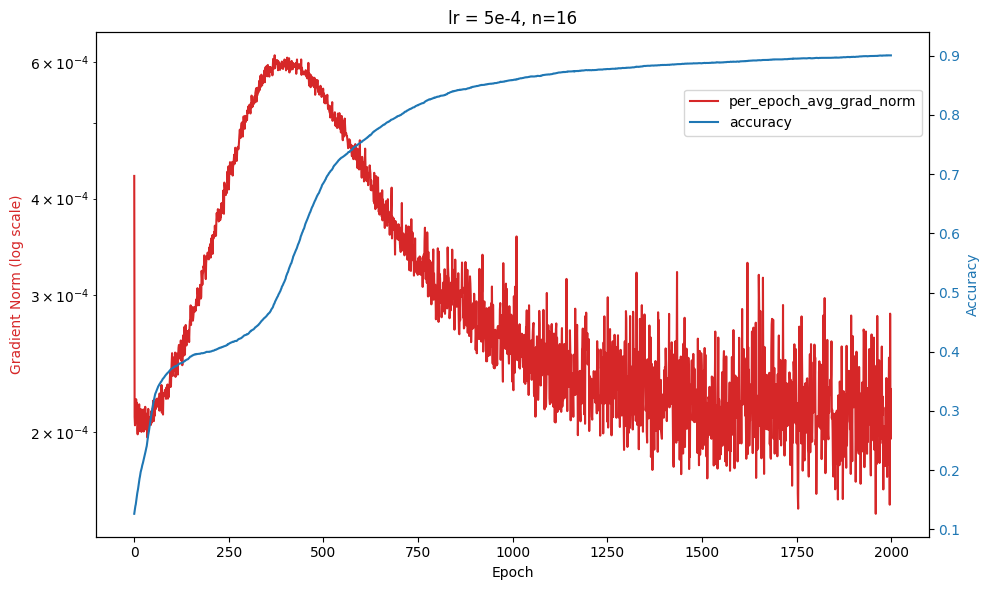

In [ ]:
df = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/case_study_use_exp/with_smaller_lr/lr=5e-4hetero=True, alpha=0.9, PushPull, lr=0.0005, n_nodes=16, batch_size=128, 2025-05-18.csv")
df1 = df[:2000]
x_axis = df1.index # 或者您的 epoch 列
# --- 示例数据结束 ---
# 创建图形和第一个y轴 (ax1 for grad_norm)
fig, ax1 = plt.subplots(figsize=(10, 6)) # 可以调整图形大小
# 设置第一个y轴 (grad_norm)
color1 = 'tab:red' # 或者直接 'red'
ax1.set_xlabel('Epoch') # 或者您横轴的实际含义
ax1.set_ylabel('Gradient Norm (log scale)', color=color1)
line1 = ax1.plot(x_axis, df1['grad_norm_per_epoch'], color=color1, label='per_epoch_avg_grad_norm')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_yscale('log') # 设置grad_norm的y轴为对数刻度
# 创建共享x轴的第二个y轴 (ax2 for accuracy)
ax2 = ax1.twinx()
color2 = 'tab:blue' # 或者直接 'blue'
ax2.set_ylabel('Accuracy', color=color2)
line2 = ax2.plot(x_axis, df1['test_accuracy(average)'], color=color2, label='accuracy')
ax2.tick_params(axis='y', labelcolor=color2)
# accuracy 的 y 轴默认是线性刻度，不需要额外设置

# 添加图例
# 为了将两个图例合并，我们需要获取它们的句柄和标签
lines = line1 + line2
labels = [l.get_label() for l in lines]
# ax1.legend(lines, labels, loc='best') # 'best' 会自动选择最佳位置
# 或者更精确地控制图例位置，例如：
ax1.legend(lines, labels, loc='upper right', bbox_to_anchor=(1, 0.9))

# 添加标题
plt.title('lr = 5e-4, n=16')

# 调整布局以防止标签重叠
fig.tight_layout()

# 显示图形
plt.show()

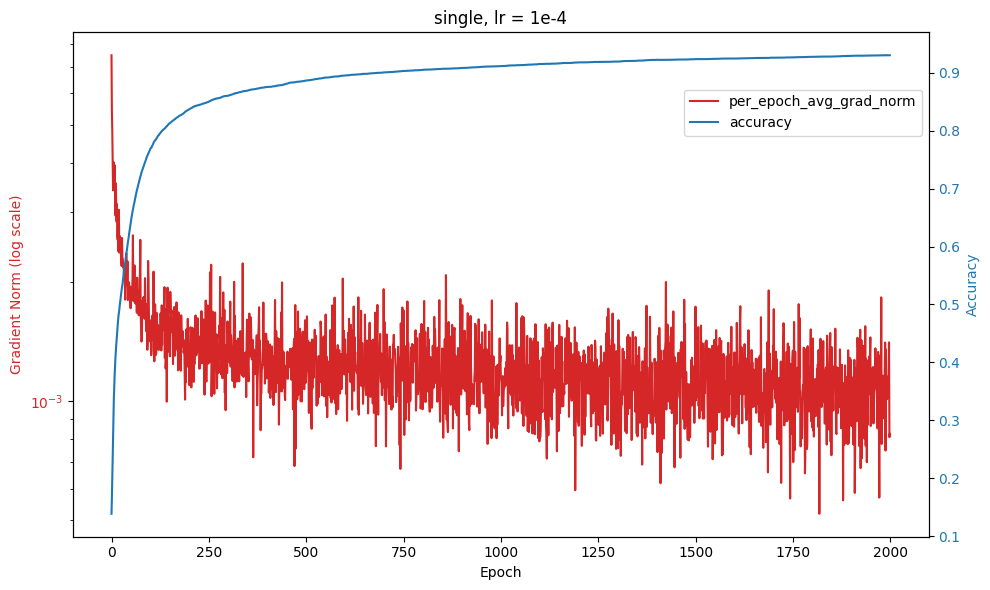

In [4]:
df = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/case_study_use_exp/with_smaller_lr/single, lr=2e-5hetero=True, alpha=0.9, PushPull, lr=2e-05, n_nodes=1, batch_size=128, 2025-05-18.csv")

# plt.plot(df1['grad_norm_per_epoch'], label='per_epoch_avg_grad_norm')
# plt.yscale('log')
# plt.legend()
# plt.show()

# plt.plot(df1['test_accuracy(average)'], label='accuracy')
# plt.legend()
# plt.show()

df1 = df[:70000]


x_axis = df1.index # 或者您的 epoch 列
# --- 示例数据结束 ---


# 创建图形和第一个y轴 (ax1 for grad_norm)
fig, ax1 = plt.subplots(figsize=(10, 6)) # 可以调整图形大小

# 设置第一个y轴 (grad_norm)
color1 = 'tab:red' # 或者直接 'red'
ax1.set_xlabel('Epoch') # 或者您横轴的实际含义
ax1.set_ylabel('Gradient Norm (log scale)', color=color1)
line1 = ax1.plot(x_axis, df1['grad_norm_per_epoch'], color=color1, label='per_epoch_avg_grad_norm')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_yscale('log') # 设置grad_norm的y轴为对数刻度

# 创建共享x轴的第二个y轴 (ax2 for accuracy)
ax2 = ax1.twinx()
color2 = 'tab:blue' # 或者直接 'blue'
ax2.set_ylabel('Accuracy', color=color2)
line2 = ax2.plot(x_axis, df1['test_accuracy(average)'], color=color2, label='accuracy')
ax2.tick_params(axis='y', labelcolor=color2)
# accuracy 的 y 轴默认是线性刻度，不需要额外设置

# 添加图例
# 为了将两个图例合并，我们需要获取它们的句柄和标签
lines = line1 + line2
labels = [l.get_label() for l in lines]
# ax1.legend(lines, labels, loc='best') # 'best' 会自动选择最佳位置
# 或者更精确地控制图例位置，例如：
ax1.legend(lines, labels, loc='upper right', bbox_to_anchor=(1, 0.9))


# 添加标题
plt.title('single, lr = 1e-4')

# 调整布局以防止标签重叠
fig.tight_layout()

# 显示图形
plt.show()

### seems from 异质性, 所以试一试: n=16的时候exp图但是均匀分布; n=16的全连接均匀图异质性数据; n=16的全连接均匀图均匀数据

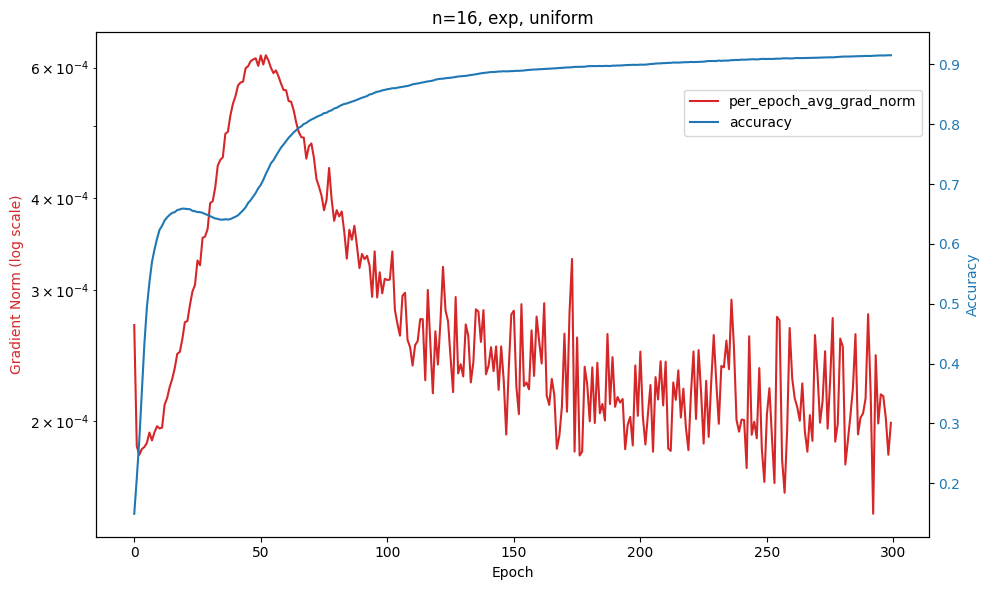

In [55]:
df = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/case_study_use_exp/new_test_异质性/exp图(n=16), 均匀分布hetero=False, alpha=0.9, PushPull, lr=0.002, n_nodes=16, batch_size=128, 2025-05-19.csv")
df1 = df[:300]
x_axis = df1.index # 或者您的 epoch 列
# --- 示例数据结束 ---
# 创建图形和第一个y轴 (ax1 for grad_norm)
fig, ax1 = plt.subplots(figsize=(10, 6)) # 可以调整图形大小
# 设置第一个y轴 (grad_norm)
color1 = 'tab:red' # 或者直接 'red'
ax1.set_xlabel('Epoch') # 或者您横轴的实际含义
ax1.set_ylabel('Gradient Norm (log scale)', color=color1)
line1 = ax1.plot(x_axis, df1['grad_norm_per_epoch'], color=color1, label='per_epoch_avg_grad_norm')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_yscale('log') # 设置grad_norm的y轴为对数刻度
# 创建共享x轴的第二个y轴 (ax2 for accuracy)
ax2 = ax1.twinx()
color2 = 'tab:blue' # 或者直接 'blue'
ax2.set_ylabel('Accuracy', color=color2)
line2 = ax2.plot(x_axis, df1['test_accuracy(average)'], color=color2, label='accuracy')
ax2.tick_params(axis='y', labelcolor=color2)
# accuracy 的 y 轴默认是线性刻度，不需要额外设置

# 添加图例
# 为了将两个图例合并，我们需要获取它们的句柄和标签
lines = line1 + line2
labels = [l.get_label() for l in lines]
# ax1.legend(lines, labels, loc='best') # 'best' 会自动选择最佳位置
# 或者更精确地控制图例位置，例如：
ax1.legend(lines, labels, loc='upper right', bbox_to_anchor=(1, 0.9))


# 添加标题
plt.title('n=16, exp, uniform')

# 调整布局以防止标签重叠
fig.tight_layout()

# 显示图形
plt.show()

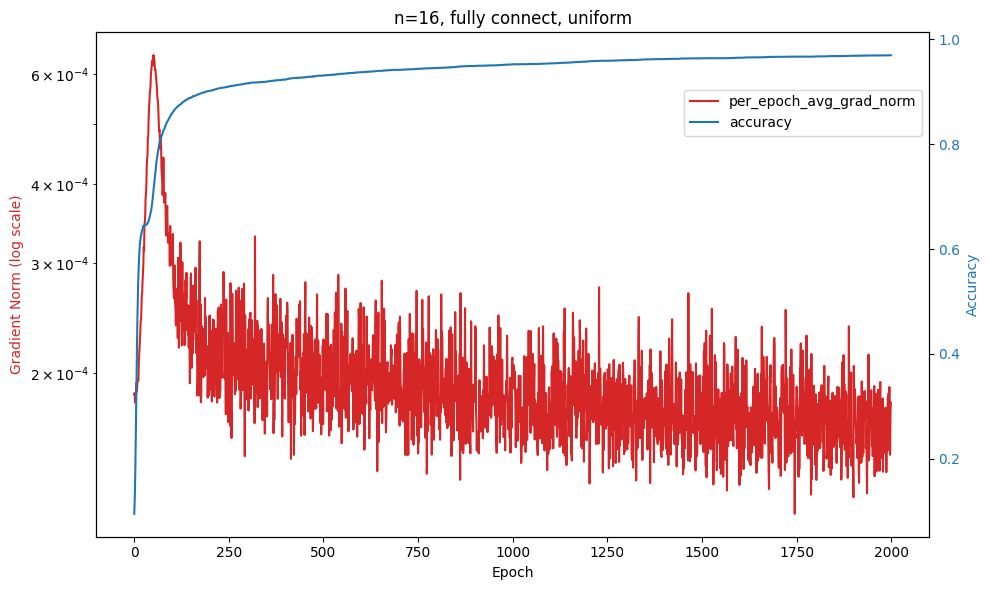

In [4]:
df = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/case_study_use_exp/new_test_异质性/full均匀(n=16),均匀分布hetero=False, alpha=0.9, PushPull, lr=0.002, n_nodes=16, batch_size=128, 2025-05-19.csv")
df1 = df[:7000]
x_axis = df1.index # 或者您的 epoch 列
# --- 示例数据结束 ---
# 创建图形和第一个y轴 (ax1 for grad_norm)
fig, ax1 = plt.subplots(figsize=(10, 6)) # 可以调整图形大小
# 设置第一个y轴 (grad_norm)
color1 = 'tab:red' # 或者直接 'red'
ax1.set_xlabel('Epoch') # 或者您横轴的实际含义
ax1.set_ylabel('Gradient Norm (log scale)', color=color1)
line1 = ax1.plot(x_axis, df1['grad_norm_per_epoch'], color=color1, label='per_epoch_avg_grad_norm')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_yscale('log') # 设置grad_norm的y轴为对数刻度
# 创建共享x轴的第二个y轴 (ax2 for accuracy)
ax2 = ax1.twinx()
color2 = 'tab:blue' # 或者直接 'blue'
ax2.set_ylabel('Accuracy', color=color2)
line2 = ax2.plot(x_axis, df1['test_accuracy(average)'], color=color2, label='accuracy')
ax2.tick_params(axis='y', labelcolor=color2)
# accuracy 的 y 轴默认是线性刻度，不需要额外设置

# 添加图例
# 为了将两个图例合并，我们需要获取它们的句柄和标签
lines = line1 + line2
labels = [l.get_label() for l in lines]
# ax1.legend(lines, labels, loc='best') # 'best' 会自动选择最佳位置
# 或者更精确地控制图例位置，例如：
ax1.legend(lines, labels, loc='upper right', bbox_to_anchor=(1, 0.9))


# 添加标题
plt.title('n=16, fully connect, uniform')

# 调整布局以防止标签重叠
fig.tight_layout()

# 显示图形
plt.show()

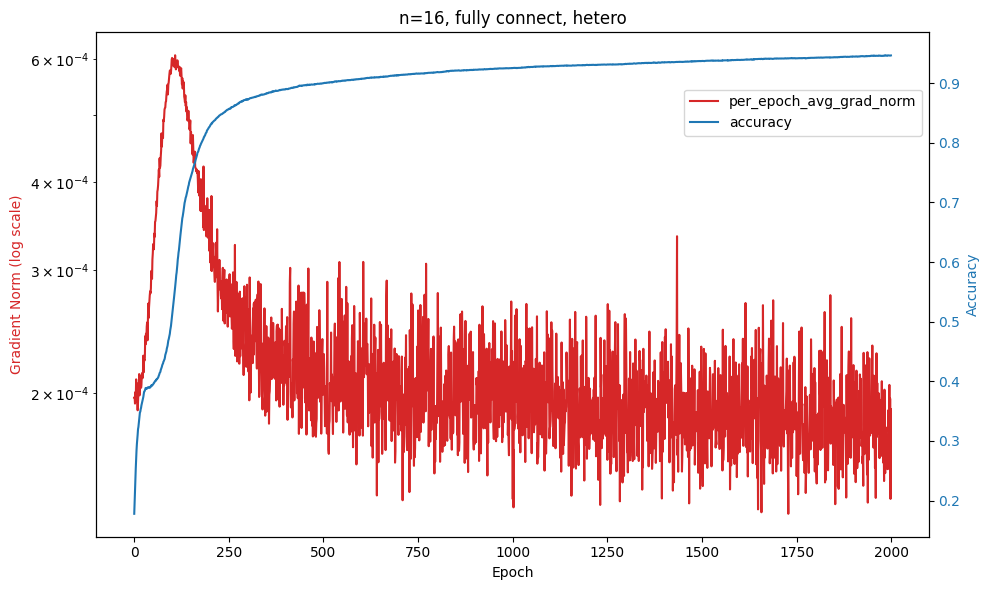

In [9]:
df = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/case_study_use_exp/new_test_异质性/full均匀(n=16),异质性分布hetero=True, alpha=0.9, PushPull, lr=0.002, n_nodes=16, batch_size=128, 2025-05-19.csv")
df1 = df[:7000]
x_axis = df1.index # 或者您的 epoch 列
# --- 示例数据结束 ---
# 创建图形和第一个y轴 (ax1 for grad_norm)
fig, ax1 = plt.subplots(figsize=(10, 6)) # 可以调整图形大小
# 设置第一个y轴 (grad_norm)
color1 = 'tab:red' # 或者直接 'red'
ax1.set_xlabel('Epoch') # 或者您横轴的实际含义
ax1.set_ylabel('Gradient Norm (log scale)', color=color1)
line1 = ax1.plot(x_axis, df1['grad_norm_per_epoch'], color=color1, label='per_epoch_avg_grad_norm')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_yscale('log') # 设置grad_norm的y轴为对数刻度
# 创建共享x轴的第二个y轴 (ax2 for accuracy)
ax2 = ax1.twinx()
color2 = 'tab:blue' # 或者直接 'blue'
ax2.set_ylabel('Accuracy', color=color2)
line2 = ax2.plot(x_axis, df1['test_accuracy(average)'], color=color2, label='accuracy')
ax2.tick_params(axis='y', labelcolor=color2)
# accuracy 的 y 轴默认是线性刻度，不需要额外设置

# 添加图例
# 为了将两个图例合并，我们需要获取它们的句柄和标签
lines = line1 + line2
labels = [l.get_label() for l in lines]
# ax1.legend(lines, labels, loc='best') # 'best' 会自动选择最佳位置
# 或者更精确地控制图例位置，例如：
ax1.legend(lines, labels, loc='upper right', bbox_to_anchor=(1, 0.9))


# 添加标题
plt.title('n=16, fully connect, hetero')

# 调整布局以防止标签重叠
fig.tight_layout()

# 显示图形
plt.show()

### Test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df1 = pd.read_csv('./test_mnist/grad_norm_test_Exp_test, PushPull, lr=0.01, n_nodes=4, batch_size=128, 2025-04-09.csv')
df2 = pd.read_csv('./test_mnist/grad_norm_test_Exp_test, 不使用异质性, PushPull, lr=0.01, n_nodes=4, batch_size=128, 2025-04-09.csv')
df3 = pd.read_csv('./test_mnist/grad_norm_test_Exp_test, 不使用异质性, PushPull, lr=0.001, n_nodes=4, batch_size=128, 2025-04-09.csv')
df4 = pd.read_csv('./test_mnist/grad_norm_test_Exp_test, PushPull, lr=0.001, n_nodes=4, batch_size=128, 2025-04-09.csv')

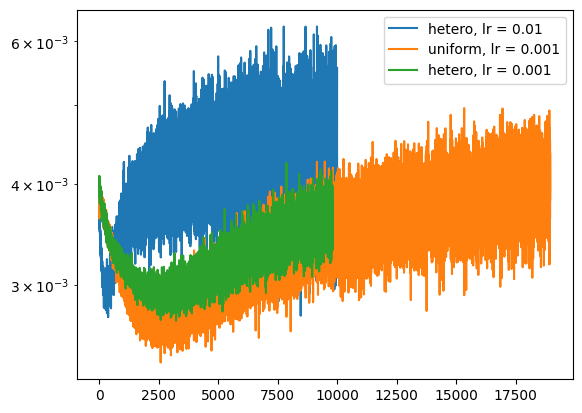

In [11]:
plt.plot(df1['avg_grad_norm'], label='hetero, lr = 0.01')
#plt.plot(df2['avg_grad_norm'], label='uniform, lr = 0.01')
plt.plot(df3['avg_grad_norm'], label='uniform, lr = 0.001')
plt.plot(df4['avg_grad_norm'], label='hetero, lr = 0.001')
plt.yscale('log')
plt.legend()
plt.show()

### 复现

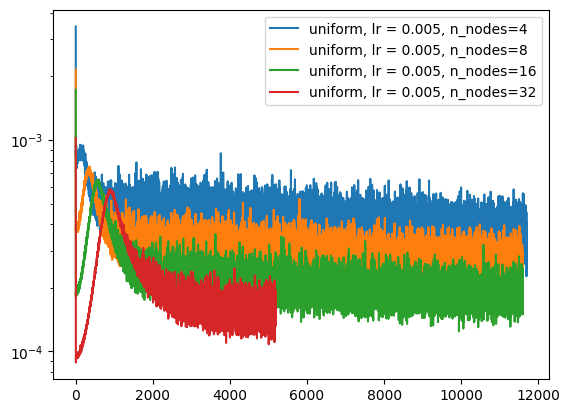

In [12]:
df1 = pd.read_csv('./test_mnist/grad_norm_复现_Exp_test,hetero=False, alpha=0.6, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-04-09.csv')
df2 = pd.read_csv('./test_mnist/grad_norm_复现_Exp_test,hetero=False, alpha=0.6, PushPull, lr=0.005, n_nodes=8, batch_size=128, 2025-04-09.csv')
df3 = pd.read_csv('./test_mnist/grad_norm_复现_Exp_test,hetero=False, alpha=0.6, PushPull, lr=0.005, n_nodes=16, batch_size=128, 2025-04-09.csv')
df4 = pd.read_csv('./test_mnist/grad_norm_复现_Exp_test,hetero=False, alpha=0.6, PushPull, lr=0.005, n_nodes=32, batch_size=128, 2025-04-09.csv')

plt.plot(df1['avg_grad_norm'], label='uniform, lr = 0.005, n_nodes=4')
plt.plot(df2['avg_grad_norm'], label='uniform, lr = 0.005, n_nodes=8')
plt.plot(df3['avg_grad_norm'], label='uniform, lr = 0.005, n_nodes=16')
plt.plot(df4['avg_grad_norm'], label='uniform, lr = 0.005, n_nodes=32')
plt.yscale('log')
plt.legend()
plt.show()

### 高异质性, Exp

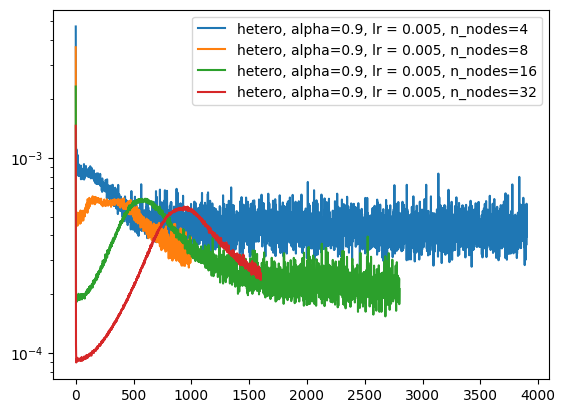

In [16]:
df1 = pd.read_csv('./test_mnist/grad_norm_Exp异质性,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-04-09.csv')
df2 = pd.read_csv('./test_mnist/grad_norm_Exp异质性,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=8, batch_size=128, 2025-04-09.csv')
df3 = pd.read_csv('./test_mnist/grad_norm_Exp异质性,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=16, batch_size=128, 2025-04-09.csv')
df4 = pd.read_csv('./test_mnist/grad_norm_Exp异质性,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=32, batch_size=128, 2025-04-09.csv')

plt.plot(df1['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.005, n_nodes=4')
plt.plot(df2['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.005, n_nodes=8')
plt.plot(df3['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.005, n_nodes=16')
plt.plot(df4['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.005, n_nodes=32')
plt.yscale('log')
plt.legend()
plt.show()

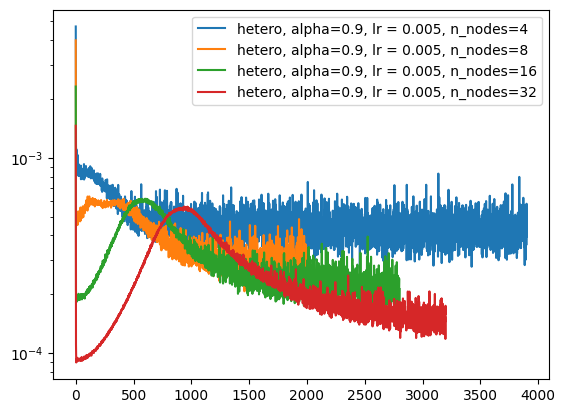

In [17]:
df1 = pd.read_csv('./test_mnist/grad_norm_Exp异质性,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-04-09.csv')
df2 = pd.read_csv('./test_mnist/grad_norm_new_Exp_异质性,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=8, batch_size=128, 2025-04-09.csv')
df3 = pd.read_csv('./test_mnist/grad_norm_Exp异质性,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=16, batch_size=128, 2025-04-09.csv')
df4 = pd.read_csv('./test_mnist/grad_norm_new_Exp_异质性,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=32, batch_size=128, 2025-04-09.csv')

plt.plot(df1['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.005, n_nodes=4')
plt.plot(df2['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.005, n_nodes=8')
plt.plot(df3['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.005, n_nodes=16')
plt.plot(df4['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.005, n_nodes=32')
plt.yscale('log')
plt.legend()
plt.show()

In [1]:
# # 对应的实验代码
# lr = 5e-3
# num_epochs = 100
# bs = 128
# alpha = 10
# use_hetero=True
# remark="Exp_异质性",

# n=4
# A, B = get_matrixs_from_exp_graph(n = n, seed=48)
# show_row(A)
# print(A.shape)
# train_track_grad_norm_with_hetero(
#     algorithm="PushPull",
#     lr=lr,
#     A=A,
#     B=B,
#     dataset_name="MNIST",
#     batch_size=bs,
#     num_epochs=num_epochs,
#     remark=remark,
#     alpha = alpha,
#     root = "/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/test_mnist",
#     use_hetero=use_hetero,
# )

# n=8
# A, B = get_matrixs_from_exp_graph(n = n, seed=48)
# show_row(A)
# print(A.shape)
# train_track_grad_norm_with_hetero(
#     algorithm="PushPull",
#     lr=lr,
#     A=A,
#     B=B,
#     dataset_name="MNIST",
#     batch_size=bs,
#     num_epochs=400,
#     remark=remark,
#     alpha = alpha,
#     root = "/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/test_mnist",
#     use_hetero=use_hetero,
# )

# n=16
# A, B = get_matrixs_from_exp_graph(n = n, seed=48)
# show_row(A)
# print(A.shape)
# train_track_grad_norm_with_hetero(
#     algorithm="PushPull",
#     lr=lr,
#     A=A,
#     B=B,
#     dataset_name="MNIST",
#     batch_size=bs,
#     num_epochs=num_epochs*4,
#     remark=remark,
#     alpha = alpha,
#     root = "/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/test_mnist",
#     use_hetero=use_hetero,
# )

# n=32
# A, B = get_matrixs_from_exp_graph(n = n, seed=48)
# show_row(A)
# print(A.shape)
# train_track_grad_norm_with_hetero(
#     algorithm="PushPull",
#     lr=lr,
#     A=A,
#     B=B,
#     dataset_name="MNIST",
#     batch_size=bs,
#     num_epochs=1600,
#     remark=remark,
#     alpha = alpha,
#     root = "/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/test_mnist",
#     use_hetero=use_hetero,
# )

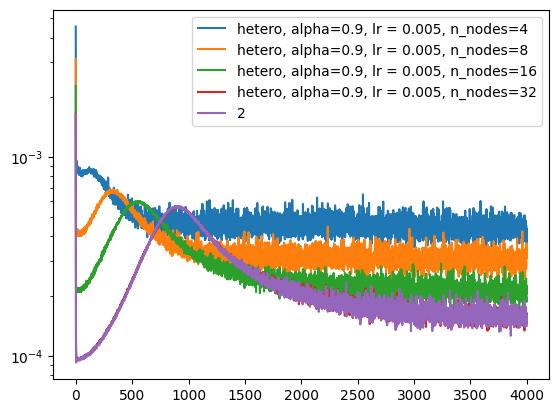

In [8]:
a = 4000

df1 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/exp_mnist_10_repeat/exp_n=4_lr=0.005.csv")
df2 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/exp_mnist_10_repeat/exp_n=8_lr=0.005.csv")
df3 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/exp_mnist_10_repeat/exp_n=16_lr=0.005.csv")
df4 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/exp_mnist_10_repeat/exp_n=32_lr=0.005.csv")

df5 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/exp_mnist_tmp/Exp_异质性grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.005, n_nodes=32, batch_size=128, 2025-04-14.csv")
df6 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/exp_mnist_tmp/Exp_异质性grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.005, n_nodes=32, batch_size=128, 2025-04-15.csv")
df7 = (df4+df5+df6)/3

plt.plot(df1['avg_grad_norm'][:a], label='hetero, alpha=0.9, lr = 0.005, n_nodes=4')
plt.plot(df2['avg_grad_norm'][:a], label='hetero, alpha=0.9, lr = 0.005, n_nodes=8')
plt.plot(df3['avg_grad_norm'][:a], label='hetero, alpha=0.9, lr = 0.005, n_nodes=16')
plt.plot(df4['avg_grad_norm'][:a], label='hetero, alpha=0.9, lr = 0.005, n_nodes=32')
#plt.plot(df5['avg_grad_norm'][:a], label='1')
plt.plot(df7['avg_grad_norm'][:a], label='2')
plt.yscale('log')
plt.legend()
plt.show()

22001 32401 2773


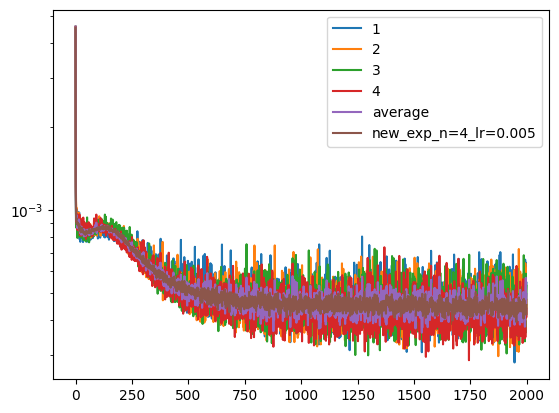

In [11]:
df1 = pd.read_csv("./repeate_test/Test1grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-04-15.csv")
df2 = pd.read_csv("./repeate_test/Test2grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-04-15.csv")
df3 = pd.read_csv("./repeate_test/Test3grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-04-15.csv")
df4 = pd.read_csv("./repeate_test/Test4grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-04-15.csv")
df5 = (df1+df2+df3+df4)/4
print(len(df1), len(df2), len(df3))
a = 2000

df10 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/exp_mnist_10_repeat/new_exp_n=4_lr=0.005.csv")

plt.plot(df1['avg_grad_norm'][:a], label='1')
plt.plot(df2['avg_grad_norm'][:a], label='2')
plt.plot(df3['avg_grad_norm'][:a], label='3')
plt.plot(df4['avg_grad_norm'][:a], label='4')
plt.plot(df5['avg_grad_norm'][:a], label='average')

plt.plot(df10['avg_grad_norm'][:a]/13, label='new_exp_n=4_lr=0.005')

plt.yscale('log')
plt.legend()
plt.show()

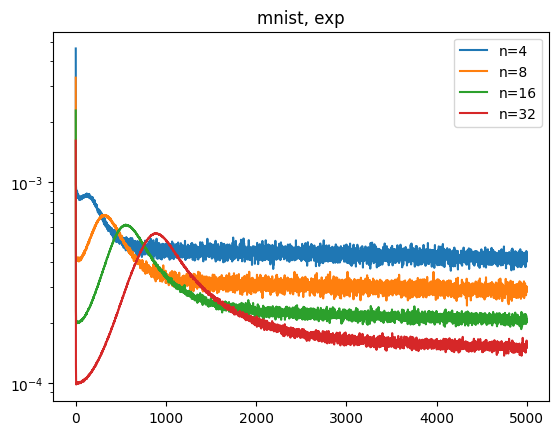

In [2]:
df1 = pd.read_csv('./exp_mnist_10_repeat/for_draw_exp_n=4_lr=0.005.csv')
df2 = pd.read_csv('./exp_mnist_10_repeat/for_draw_exp_n=8_lr=0.005.csv')
df3 = pd.read_csv('./exp_mnist_10_repeat/new_for_draw_exp_n=16_lr=0.005.csv')
df4 = pd.read_csv('./exp_mnist_10_repeat/new_for_draw_exp_n=32_lr=0.005.csv')

a = 5000

plt.plot(df1['avg_grad_norm'][:a], label='n=4')
plt.plot(df2['avg_grad_norm'][:a], label='n=8')
plt.plot(df3['avg_grad_norm'][:a], label='n=16')
plt.plot(df4['avg_grad_norm'][:a], label='n=32')
plt.yscale('log')
plt.title("mnist, exp")
plt.legend()
plt.show()

n=4 和 n=8 都需要跑满20次.

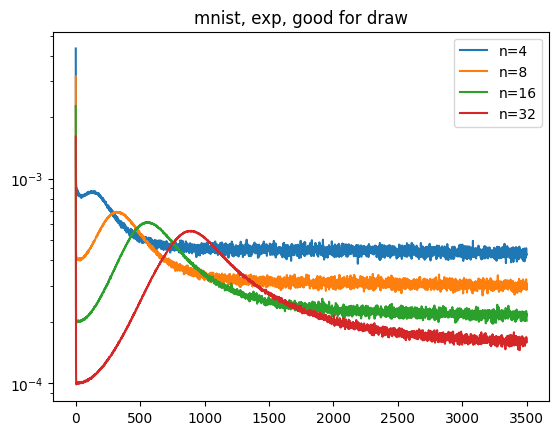

In [2]:
df1 = pd.read_csv('./exp_mnist_10_repeat/brand_new_for_draw_exp_n=4_lr=0.005.csv')
df2 = pd.read_csv('./exp_mnist_10_repeat/brand_new_for_draw_exp_n=8_lr=0.005.csv')
df3 = pd.read_csv('./exp_mnist_10_repeat/new_for_draw_exp_n=16_lr=0.005.csv')
df4 = pd.read_csv('./exp_mnist_10_repeat/new_for_draw_exp_n=32_lr=0.005.csv')

a = 3500

plt.plot(df1['avg_grad_norm'][:a], label='n=4')
plt.plot(df2['avg_grad_norm'][:a], label='n=8')
plt.plot(df3['avg_grad_norm'][:a], label='n=16')
plt.plot(df4['avg_grad_norm'][:a], label='n=32')
plt.yscale('log')
plt.title("mnist, exp, good for draw")
plt.legend()
plt.show()

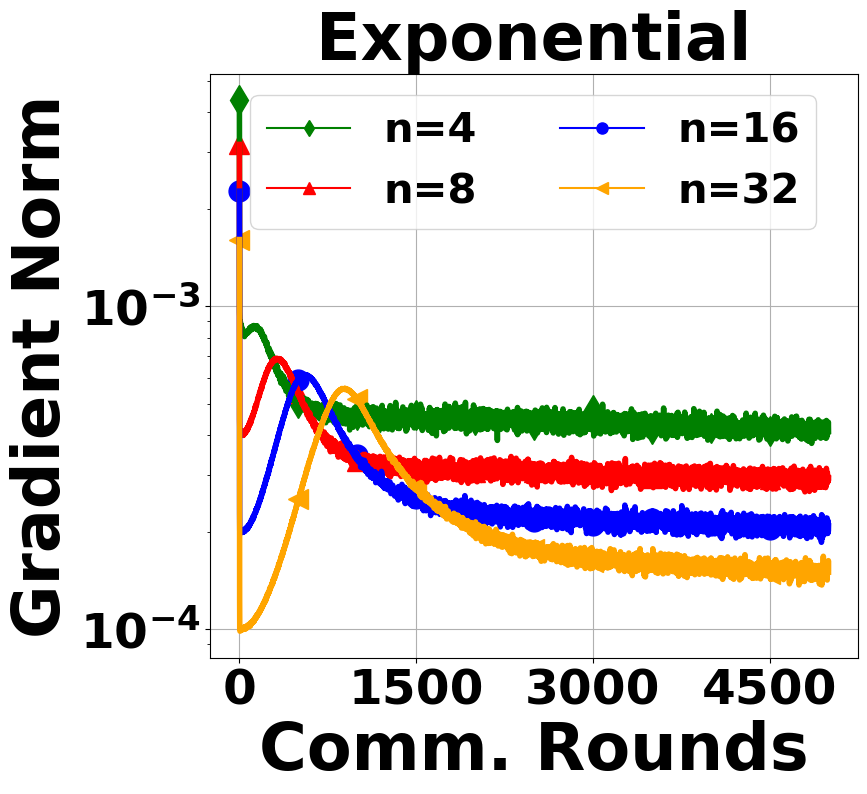

In [11]:
s=5000

df1 = pd.read_csv('./exp_mnist_10_repeat/brand_new_for_draw_exp_n=4_lr=0.005.csv')
df2 = pd.read_csv('./exp_mnist_10_repeat/brand_new_for_draw_exp_n=8_lr=0.005.csv')
df3 = pd.read_csv('./exp_mnist_10_repeat/new_for_draw_exp_n=16_lr=0.005.csv')
df4 = pd.read_csv('./exp_mnist_10_repeat/new_for_draw_exp_n=32_lr=0.005.csv')

grads = [
    df1['avg_grad_norm'][:s],
    df2['avg_grad_norm'][:s],
    df3['avg_grad_norm'][:s],
    df4['avg_grad_norm'][:s],
]
legend = [
    "n=4",
    "n=8",
    "n=16",
    "n=32",
]

prettyshow(grads, legend, save="/Users/luogan/Code/ICML2025_project/PUSHPULL_PROJECT/最终的实验/pdf/exp_mnist.pdf", ylabel="Gradient Norm")

### mnist grid

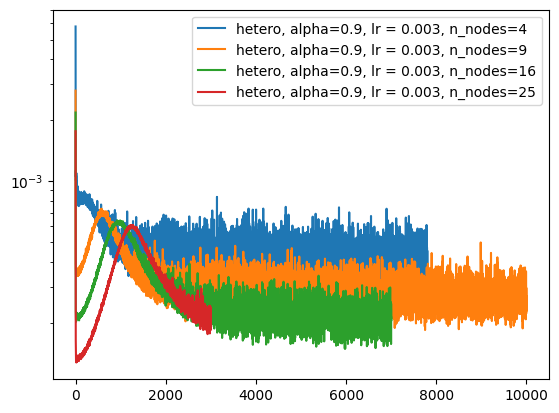

In [2]:
df1 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/grid_mnist/grad_norm,hetero=True, alpha=0.9, PushPull, lr=0.003, n_nodes=4, batch_size=128, 2025-04-13.csv")
df2 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/grid_mnist/grad_norm,hetero=True, alpha=0.9, PushPull, lr=0.003, n_nodes=9, batch_size=128, 2025-04-13.csv")
df3 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/grid_mnist/grad_norm,hetero=True, alpha=0.9, PushPull, lr=0.003, n_nodes=16, batch_size=128, 2025-04-13.csv")
df4 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/grid_mnist/grad_norm,hetero=True, alpha=0.9, PushPull, lr=0.003, n_nodes=25, batch_size=128, 2025-04-13.csv")

plt.plot(df1['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.003, n_nodes=4')
plt.plot(df2['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.003, n_nodes=9')
plt.plot(df3['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.003, n_nodes=16')
plt.plot(df4['avg_grad_norm'], label='hetero, alpha=0.9, lr = 0.003, n_nodes=25')
plt.yscale('log')
plt.legend()
plt.show()

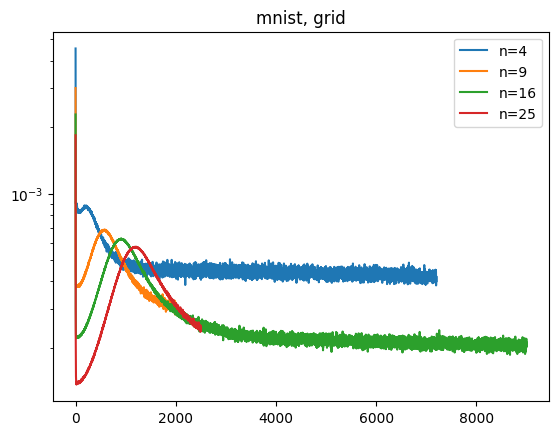

In [2]:
df1 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=4_lr=0.003.csv')
df2 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=9_lr=0.003.csv')
df3 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=16_lr=0.003.csv')
df4 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=25_lr=0.003.csv')

a = 40000

plt.plot(df1['avg_grad_norm'][:a], label='n=4')
plt.plot(df2['avg_grad_norm'][:a], label='n=9')
plt.plot(df3['avg_grad_norm'][:a], label='n=16')
plt.plot(df4['avg_grad_norm'][:a], label='n=25')
plt.yscale('log')
plt.title("mnist, grid")
plt.legend()
plt.show()

n=9 和 n=25还需要再加一倍的epoch

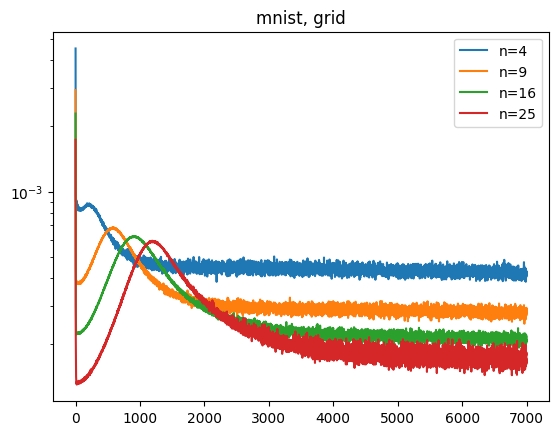

In [3]:
df1 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=4_lr=0.003.csv')
df2 = pd.read_csv('./grid_mnist_repeat/brand_new_for_draw_exp_n=9_lr=0.003.csv')
df3 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=16_lr=0.003.csv')
df4 = pd.read_csv('./grid_mnist_repeat/brand_new_for_draw_exp_n=25_lr=0.003.csv')

a = 7000

plt.plot(df1['avg_grad_norm'][:a], label='n=4')
plt.plot(df2['avg_grad_norm'][:a], label='n=9')
plt.plot(df3['avg_grad_norm'][:a], label='n=16')
plt.plot(df4['avg_grad_norm'][:a], label='n=25')
plt.yscale('log')
plt.title("mnist, grid")
plt.legend()
plt.show()

grid的n=25看起来还需要重复一些

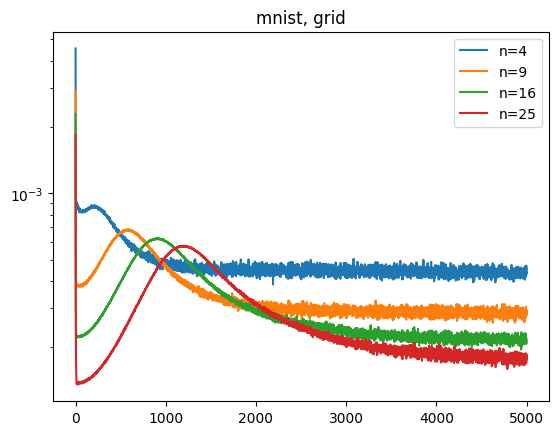

In [10]:
df1 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=4_lr=0.003.csv')
df2 = pd.read_csv('./grid_mnist_repeat/brand_new_for_draw_exp_n=9_lr=0.003.csv')
df3 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=16_lr=0.003.csv')
df4 = pd.read_csv('./grid_mnist_repeat/new_brand_new_for_draw_exp_n=25_lr=0.003.csv')
# df5 = pd.read_csv('./grid_mnist_repeat/brand_new_for_draw_exp_n=25_lr=0.003.csv')
# df6 = (df4+df5)/2

a = 5000

plt.plot(df1['avg_grad_norm'][:a], label='n=4')
plt.plot(df2['avg_grad_norm'][:a], label='n=9')
plt.plot(df3['avg_grad_norm'][:a], label='n=16')
plt.plot(df4['avg_grad_norm'][:a], label='n=25')
plt.yscale('log')
plt.title("mnist, grid")
plt.legend()
plt.show()

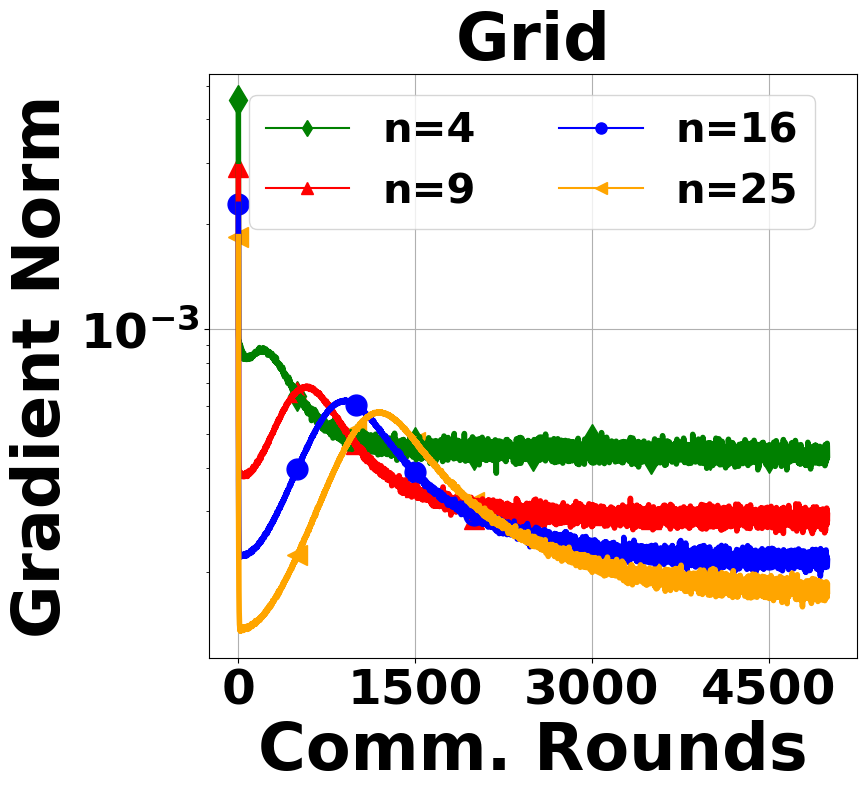

In [15]:
s=5000

df1 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=4_lr=0.003.csv')
df2 = pd.read_csv('./grid_mnist_repeat/brand_new_for_draw_exp_n=9_lr=0.003.csv')
df3 = pd.read_csv('./grid_mnist_repeat/new_for_draw_exp_n=16_lr=0.003.csv')
df4 = pd.read_csv('./grid_mnist_repeat/new_brand_new_for_draw_exp_n=25_lr=0.003.csv')

grads = [
    df1['avg_grad_norm'][:s],
    df2['avg_grad_norm'][:s],
    df3['avg_grad_norm'][:s],
    df4['avg_grad_norm'][:s],
]
legend = [
    "n=4",
    "n=9",
    "n=16",
    "n=25",
]

prettyshow(grads, legend, save="/Users/luogan/Code/ICML2025_project/PUSHPULL_PROJECT/最终的实验/pdf/grid_mnist.pdf", ylabel="Gradient Norm")

#### 测试average

In [40]:
df1 = pd.read_csv('/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/grid_mnist/firstgrad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.003, n_nodes=4, batch_size=128, 2025-04-14.csv')
df2 = pd.read_csv('/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/grid_mnist/secondgrad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.003, n_nodes=4, batch_size=128, 2025-04-14.csv')

In [50]:
df3 = (df1+df2)/2
df4 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/grid_mnist/third grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.003, n_nodes=4, batch_size=128, 2025-04-14.csv")
df5 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/grid_mnist/FOURTH grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.003, n_nodes=4, batch_size=128, 2025-04-14.csv")
df7 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/grid_mnist/newnewnew grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.003, n_nodes=4, batch_size=128, 2025-04-14.csv")

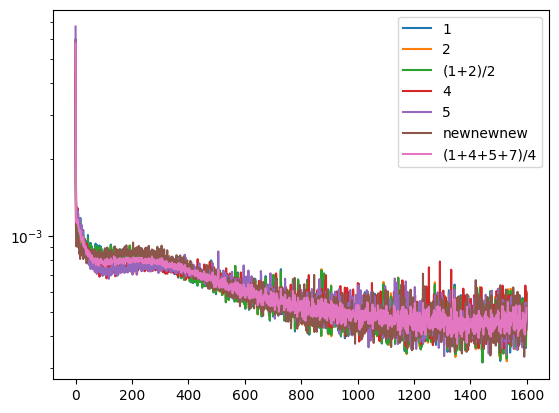

In [53]:
a = 1600

df6 = (df1[:a]+df4[:a]+df5[:a]+df7[:a])/4

plt.plot(df1['avg_grad_norm'][:a], label='1')
plt.plot(df2['avg_grad_norm'][:a], label='2')
plt.plot(df3['avg_grad_norm'][:a], label='(1+2)/2')
plt.plot(df4['avg_grad_norm'][:a], label='4')
plt.plot(df5['avg_grad_norm'][:a], label='5')   
plt.plot(df7['avg_grad_norm'][:a], label='newnewnew')
plt.plot(df6['avg_grad_norm'][:a], label='(1+4+5+7)/4')
plt.yscale('log')
plt.legend()
plt.show()

说明average好像作用不大? 可能是dataloader根本没有随机?

确实是dataloader随机性的问题..

### mnist ring

In [ ]:
# n=16
# A, B = generate_ring_matrices(n = n, seed=42)
# show_row(A)

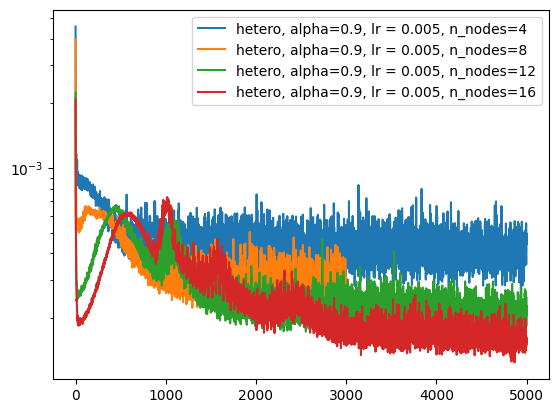

In [9]:
a = 5000

df1 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/ring_mnist/grad_norm,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=4, batch_size=128, 2025-04-13.csv")
df2 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/ring_mnist/grad_norm,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=8, batch_size=128, 2025-04-13.csv")
df3 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/ring_mnist/grad_norm,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=12, batch_size=128, 2025-04-13.csv")
df4 = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/ring_mnist/grad_norm,hetero=True, alpha=0.9, PushPull, lr=0.005, n_nodes=16, batch_size=128, 2025-04-13.csv")

plt.plot(df1['avg_grad_norm'][:a], label='hetero, alpha=0.9, lr = 0.005, n_nodes=4')
plt.plot(df2['avg_grad_norm'][:a], label='hetero, alpha=0.9, lr = 0.005, n_nodes=8')
plt.plot(df3['avg_grad_norm'][:a], label='hetero, alpha=0.9, lr = 0.005, n_nodes=12')
plt.plot(df4['avg_grad_norm'][:a], label='hetero, alpha=0.9, lr = 0.005, n_nodes=16')
plt.yscale('log')
plt.legend()
plt.show()

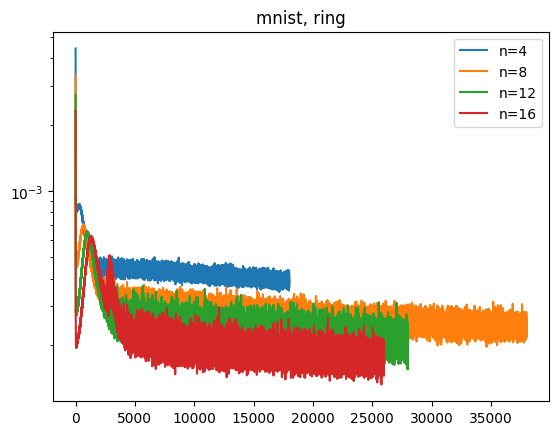

In [6]:
df1 = pd.read_csv('./ring_mnist_repeate/new_for_draw_exp_n=4_lr=0.002.csv')
df2 = pd.read_csv('./ring_mnist_repeate/new_for_draw_exp_n=8_lr=0.002.csv')
df3 = pd.read_csv('./ring_mnist_repeate/new_for_draw_exp_n=12_lr=0.002.csv')
df4 = pd.read_csv('./ring_mnist_repeate/new_for_draw_exp_n=16_lr=0.002.csv')

a = 100000

plt.plot(df1['avg_grad_norm'][:a], label='n=4')
plt.plot(df2['avg_grad_norm'][:a], label='n=8')
plt.plot(df3['avg_grad_norm'][:a], label='n=12')
plt.plot(df4['avg_grad_norm'][:a], label='n=16')
plt.yscale('log')
plt.title("mnist, ring")
plt.legend()
plt.show()

还没有跑完就断电了，之后继续跑完

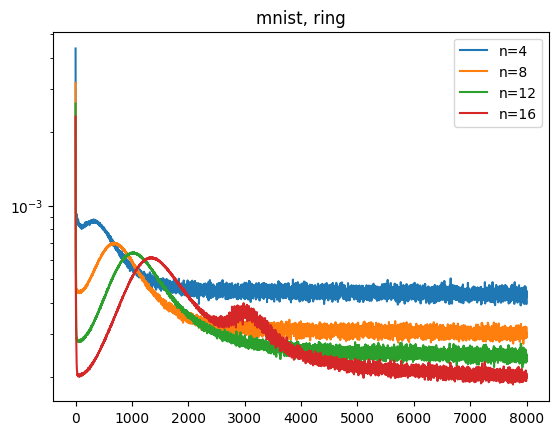

In [8]:
df1 = pd.read_csv('./ring_mnist_repeate/brand_new_for_draw_exp_n=4_lr=0.002.csv')
df2 = pd.read_csv('./ring_mnist_repeate/brand_new_for_draw_exp_n=8_lr=0.002.csv')
df3 = pd.read_csv('./ring_mnist_repeate/brand_new_for_draw_exp_n=12_lr=0.002.csv')
df4 = pd.read_csv('./ring_mnist_repeate/brand_new_for_draw_exp_n=16_lr=0.002.csv')

a = 8000

plt.plot(df1['avg_grad_norm'][:a], label='n=4')
plt.plot(df2['avg_grad_norm'][:a], label='n=8')
plt.plot(df3['avg_grad_norm'][:a], label='n=12')
plt.plot(df4['avg_grad_norm'][:a], label='n=16')
plt.yscale('log')
plt.title("mnist, ring")
plt.legend()
plt.show()

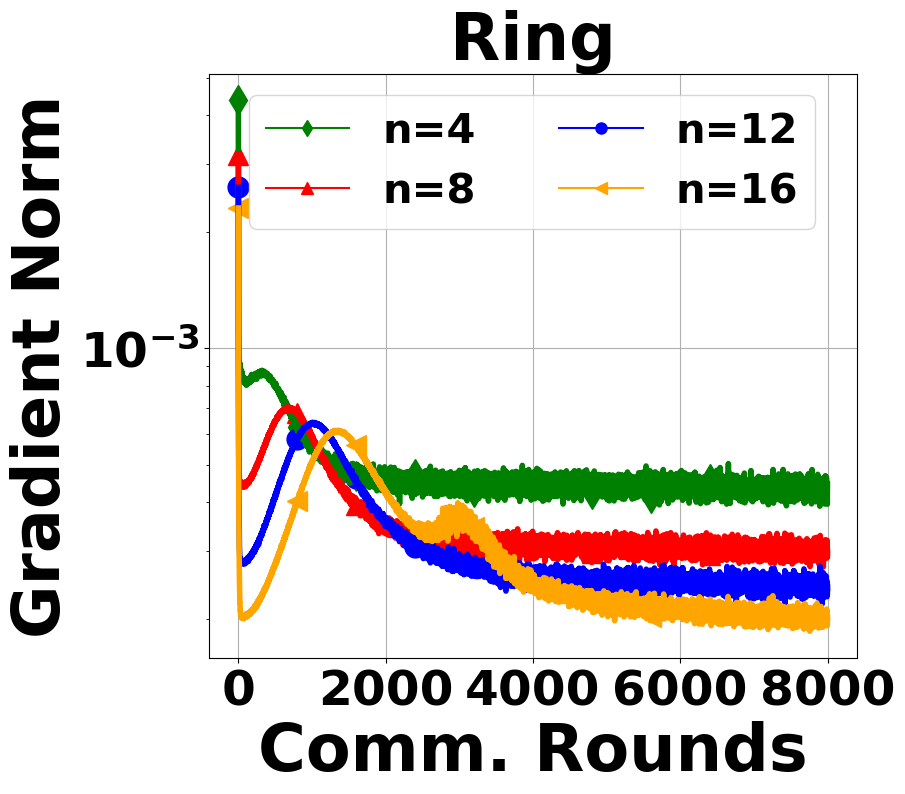

In [22]:
s=8000

df1 = pd.read_csv('./ring_mnist_repeate/brand_new_for_draw_exp_n=4_lr=0.002.csv')
df2 = pd.read_csv('./ring_mnist_repeate/brand_new_for_draw_exp_n=8_lr=0.002.csv')
df3 = pd.read_csv('./ring_mnist_repeate/brand_new_for_draw_exp_n=12_lr=0.002.csv')
df4 = pd.read_csv('./ring_mnist_repeate/brand_new_for_draw_exp_n=16_lr=0.002.csv')

grads = [
    df1['avg_grad_norm'][:s],
    df2['avg_grad_norm'][:s],
    df3['avg_grad_norm'][:s],
    df4['avg_grad_norm'][:s],
]
legend = [
    "n=4",
    "n=8",
    "n=12",
    "n=16",
]

prettyshow(grads, legend, save="/Users/luogan/Code/ICML2025_project/PUSHPULL_PROJECT/最终的实验/pdf/ring_mnist.pdf", ylabel="Gradient Norm")

### 哎，CIFAR10跑不动, 可以先在MNIST把剩下的3个图先跑了: 几何图, nearest neighbor, random graph(每条边有p的概率存在, p=3/n~1/3)

### 随机图

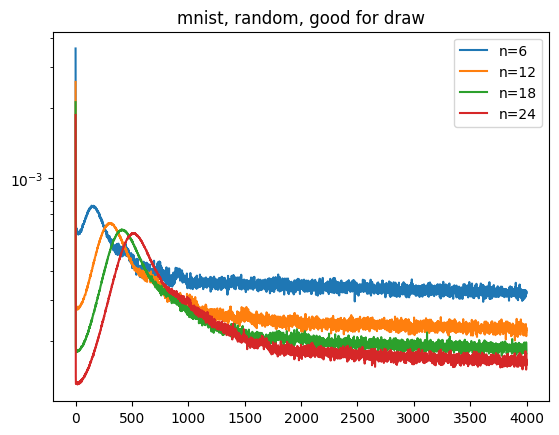

In [7]:
df1 = pd.read_csv('./random_graph_repeat/brand_new_for_draw_exp_n=6_lr=0.007.csv')
df2 = pd.read_csv('./random_graph_repeat/brand_new_for_draw_exp_n=12_lr=0.007.csv')
df3 = pd.read_csv('./random_graph_repeat/brand_new_for_draw_exp_n=18_lr=0.007.csv')
df4 = pd.read_csv('./random_graph_repeat/brand_new_for_draw_exp_n=24_lr=0.007.csv')

a = 4000

plt.plot(df1['avg_grad_norm'][:a], label='n=6')
plt.plot(df2['avg_grad_norm'][:a], label='n=12')
plt.plot(df3['avg_grad_norm'][:a], label='n=18')
plt.plot(df4['avg_grad_norm'][:a], label='n=24')
plt.yscale('log')
plt.title("mnist, random, good for draw")
plt.legend()
plt.show()

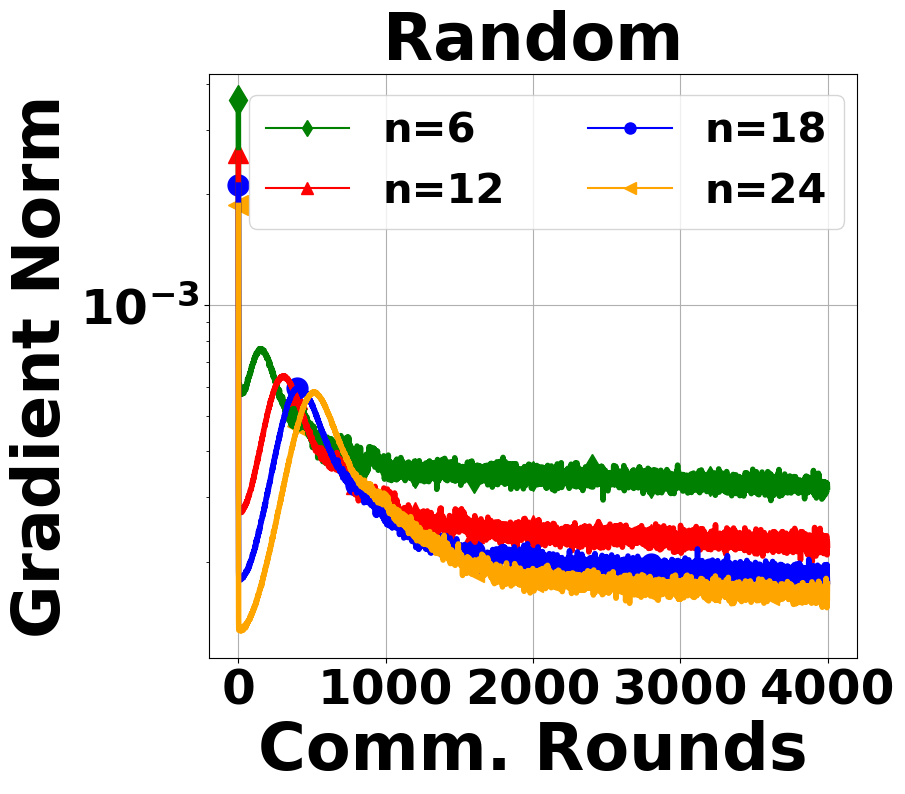

In [24]:
s=4000

df1 = pd.read_csv('./random_graph_repeat/brand_new_for_draw_exp_n=6_lr=0.007.csv')
df2 = pd.read_csv('./random_graph_repeat/brand_new_for_draw_exp_n=12_lr=0.007.csv')
df3 = pd.read_csv('./random_graph_repeat/brand_new_for_draw_exp_n=18_lr=0.007.csv')
df4 = pd.read_csv('./random_graph_repeat/brand_new_for_draw_exp_n=24_lr=0.007.csv')

grads = [
    df1['avg_grad_norm'][:s],
    df2['avg_grad_norm'][:s],
    df3['avg_grad_norm'][:s],
    df4['avg_grad_norm'][:s],
]
legend = [
    "n=6",
    "n=12",
    "n=18",
    "n=24",
]

prettyshow(grads, legend, save="/Users/luogan/Code/ICML2025_project/PUSHPULL_PROJECT/最终的实验/pdf/random_mnist.pdf", ylabel="Gradient Norm")

### 几何图(k=5)

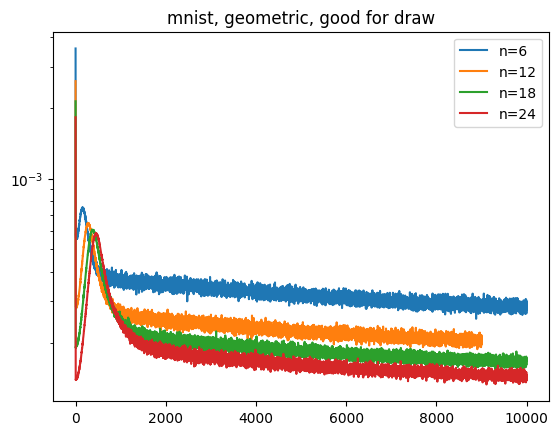

In [3]:
df1 = pd.read_csv('./geometric_repeate/brand_new_for_draw_exp_n=6_lr=0.007.csv')
df2 = pd.read_csv('./geometric_repeate/brand_new_for_draw_exp_n=12_lr=0.007.csv')
df3 = pd.read_csv('./geometric_repeate/brand_new_for_draw_exp_n=18_lr=0.007.csv')
df4 = pd.read_csv('./geometric_repeate/brand_new_for_draw_exp_n=24_lr=0.007.csv')

a = 10000

plt.plot(df1['avg_grad_norm'][:a], label='n=6')
plt.plot(df2['avg_grad_norm'][:a], label='n=12')
plt.plot(df3['avg_grad_norm'][:a], label='n=18')
plt.plot(df4['avg_grad_norm'][:a], label='n=24')
plt.yscale('log')
plt.title("mnist, geometric, good for draw")
plt.legend()
plt.show()

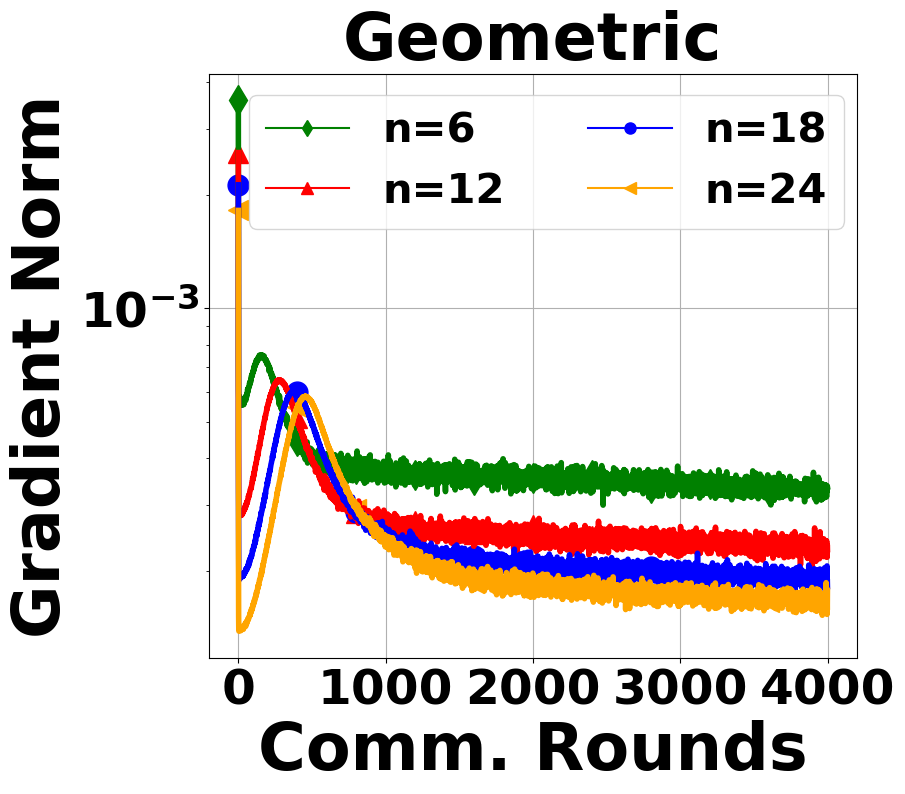

In [29]:
s=4000

df1 = pd.read_csv('./geometric_repeate/brand_new_for_draw_exp_n=6_lr=0.007.csv')
df2 = pd.read_csv('./geometric_repeate/brand_new_for_draw_exp_n=12_lr=0.007.csv')
df3 = pd.read_csv('./geometric_repeate/brand_new_for_draw_exp_n=18_lr=0.007.csv')
df4 = pd.read_csv('./geometric_repeate/brand_new_for_draw_exp_n=24_lr=0.007.csv')

grads = [
    df1['avg_grad_norm'][:s],
    df2['avg_grad_norm'][:s],
    df3['avg_grad_norm'][:s],
    df4['avg_grad_norm'][:s],
]
legend = [
    "n=6",
    "n=12",
    "n=18",
    "n=24",
]

prettyshow(grads, legend, save="/Users/luogan/Code/ICML2025_project/PUSHPULL_PROJECT/最终的实验/pdf/geometric_mnist.pdf", ylabel="Gradient Norm")

### 临近图

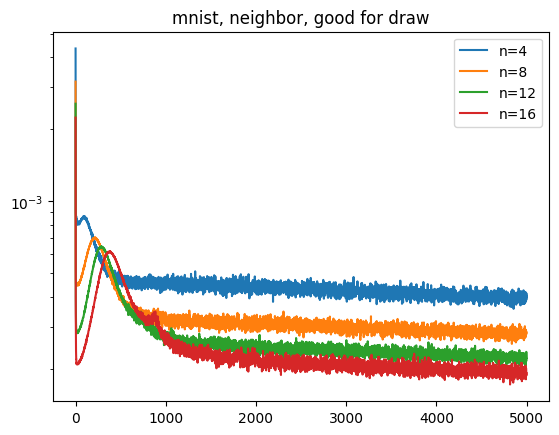

In [3]:
df1 = pd.read_csv('./neighbor_repeate/brand_new_for_draw_exp_n=4_lr=0.007.csv')
df2 = pd.read_csv('./neighbor_repeate/brand_new_for_draw_exp_n=8_lr=0.007.csv')
df3 = pd.read_csv('./neighbor_repeate/brand_new_for_draw_exp_n=12_lr=0.007.csv')
df4 = pd.read_csv('./neighbor_repeate/brand_new_for_draw_exp_n=16_lr=0.007.csv')

a = 5000

plt.plot(df1['avg_grad_norm'][:a], label='n=4')
plt.plot(df2['avg_grad_norm'][:a], label='n=8')
plt.plot(df3['avg_grad_norm'][:a], label='n=12')
plt.plot(df4['avg_grad_norm'][:a], label='n=16')
plt.yscale('log')
plt.title("mnist, neighbor, good for draw")
plt.legend()
plt.show()

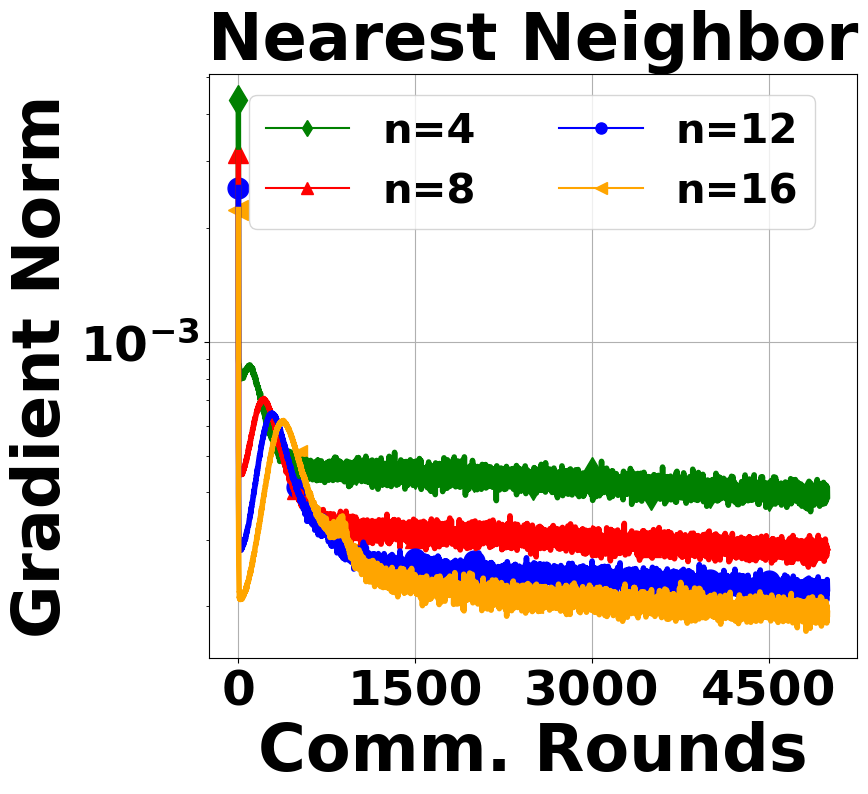

In [27]:
s=5000

df1 = pd.read_csv('./neighbor_repeate/brand_new_for_draw_exp_n=4_lr=0.007.csv')
df2 = pd.read_csv('./neighbor_repeate/brand_new_for_draw_exp_n=8_lr=0.007.csv')
df3 = pd.read_csv('./neighbor_repeate/brand_new_for_draw_exp_n=12_lr=0.007.csv')
df4 = pd.read_csv('./neighbor_repeate/brand_new_for_draw_exp_n=16_lr=0.007.csv')

grads = [
    df1['avg_grad_norm'][:s],
    df2['avg_grad_norm'][:s],
    df3['avg_grad_norm'][:s],
    df4['avg_grad_norm'][:s],
]
legend = [
    "n=4",
    "n=8",
    "n=12",
    "n=16",
]

prettyshow(grads, legend, save="/Users/luogan/Code/ICML2025_project/PUSHPULL_PROJECT/最终的实验/pdf/neighbor_mnist.pdf", ylabel="Gradient Norm")

### 接下来是CIFAR10的实验

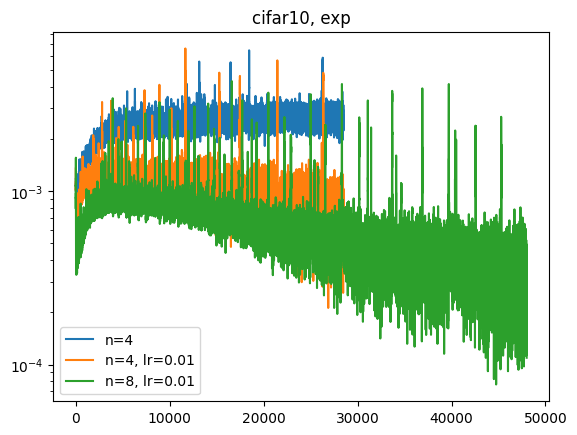

In [2]:
df1 = pd.read_csv('./EXP_CIFAR10_repeat/test_exp_n=4_lr=0.001.csv')
df2 = pd.read_csv('./EXP_CIFAR10_repeat/test_exp_n=4_lr=0.01.csv')
df3 = pd.read_csv('./EXP_CIFAR10_repeat/test_exp_n=8_lr=0.01.csv')

a = 150000

plt.plot(df1['avg_grad_norm'][:a], label='n=4')
plt.plot(df2['avg_grad_norm'][:a], label='n=4, lr=0.01')
plt.plot(df3['avg_grad_norm'][:a], label='n=8, lr=0.01')
plt.yscale('log')
plt.title("cifar10, exp")
plt.legend()
plt.show()

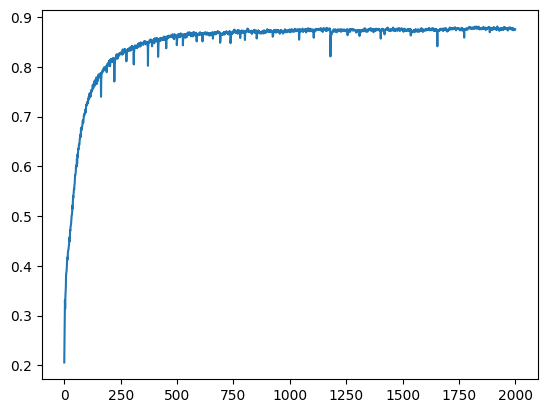

In [4]:
df = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/EXP_CIFAR10_tmp/newnewhetero=True, alpha=0.9, PushPull, lr=0.01, n_nodes=8, batch_size=128, 2025-04-27.csv")
plt.plot(df["test_accuracy(average)"][:], label='test_accuracy(average)')
plt.show()

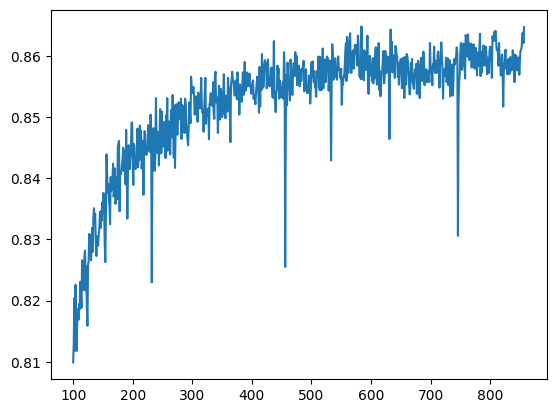

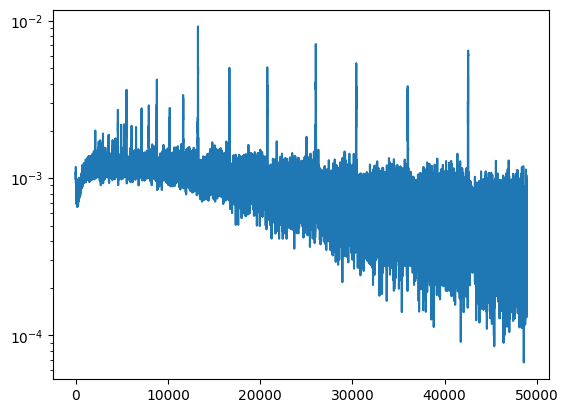

In [5]:
df = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/EXP_CIFAR10_tmp/repeat_20hetero=True, alpha=0.9, PushPull, lr=0.01, n_nodes=4, batch_size=128, 2025-05-04.csv")
plt.plot(df["test_accuracy(average)"][100:], label='test_accuracy(average)')
plt.show()

df = pd.read_csv("/home/lg/ICML2025_project/PUSHPULL_PROJECT/最终的实验/EXP_CIFAR10_tmp/repeat_20grad_norm,hetero=True,s alpha=0.9, PushPull, lr=0.01, n_nodes=4, batch_size=128, 2025-05-04.csv")
plt.plot(df["avg_grad_norm"][1:], label='avg_grad_norm')
plt.yscale('log')
plt.show()

### data distribution

In [1]:
import torch
import os
import torch.nn as nn
import pandas as pd

In [14]:
import torch
import torchvision
import numpy as np
import random # 导入 random 模块
from typing import List, Tuple
from torch.utils.data import DataLoader, Dataset, Subset, ConcatDataset # 显式导入需要的类


import torch
import torch.utils.data
import torchvision
import torchvision.transforms as transforms
import numpy as np
import random
from typing import Tuple, List


MNIST_transform_train = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

MNIST_transform_test = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

def get_dataloaders_high_hetero_fixed_batch( # 函数名稍作修改以示区别
    n: int,
    dataset_name: str,
    batch_size: int,
    alpha: float = 0.5,
    repeat: int = 1,
    seed: int = 42 # 添加 seed 参数，并设置默认值
) -> Tuple[List[DataLoader], DataLoader, DataLoader]:
    """
    生成具有受种子控制的异构数据分布的DataLoader。

    Args:
        n (int): 客户端节点数量。
        dataset_name (str): 数据集名称 ("CIFAR10" 或 "MNIST")。
        batch_size (int): 训练DataLoader的批量大小。
        alpha (float, optional): Dirichlet分布的集中度参数。默认为 0.5。
        repeat (int, optional): 重复训练数据集的次数。默认为 1。
        seed (int, optional): 用于可复现性的随机种子。默认为 42。

    Returns:
        Tuple[List[DataLoader], DataLoader, DataLoader]:
            一个包含以下内容的元组：
            - 每个节点的训练DataLoader列表。
            - 测试DataLoader。
            - 完整的训练DataLoader（使用原始的、未重复的数据集）。
    """
    # --- 设置种子 ---
    print(f"函数内设置种子为: {seed}") # 可选：打印正在使用的种子
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    # 如果使用CUDA，也设置GPU种子
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed) # 适用于多GPU设置
        # 为了确保卷积操作的可复现性（可能会牺牲性能）
        # torch.backends.cudnn.deterministic = True
        # torch.backends.cudnn.benchmark = False

    # 为 DataLoader 创建一个生成器对象
    generator = torch.Generator()
    generator.manual_seed(seed)
    # --- 结束设置种子 ---

    # --- 数据集加载 ---
    # 注意：建议将 root 路径也作为参数传入，而不是硬编码
    data_root = "/home/lg/ICML2025_project/data/raw" # 定义根目录

    if dataset_name == "CIFAR10":
        transform_train, transform_test = (
            cifar10_transform_train,
            cifar10_transform_test,
        )
        try:
            trainset = torchvision.datasets.CIFAR10(
                root=f"{data_root}/CIFAR10",
                train=True,
                download=False, # 通常在生产环境中设为False
                transform=transform_train,
            )
            testset = torchvision.datasets.CIFAR10(
                root=f"{data_root}/CIFAR10",
                train=False,
                download=False,
                transform=transform_test,
            )
        except Exception as e:
            print(f"加载 CIFAR10 数据集失败，请确保路径 {data_root}/CIFAR10 正确且包含数据。错误：{e}")
            raise
        num_classes = 10
    elif dataset_name == "MNIST":
        transform_train, transform_test = MNIST_transform_train, MNIST_transform_test
        try:
            trainset = torchvision.datasets.MNIST(
                root=f"{data_root}/MNIST",
                train=True,
                download=False,
                transform=transform_train,
            )
            testset = torchvision.datasets.MNIST(
                root=f"{data_root}/MNIST",
                train=False,
                download=False,
                transform=transform_test,
            )
        except Exception as e:
            print(f"加载 MNIST 数据集失败，请确保路径 {data_root}/MNIST 正确且包含数据。错误：{e}")
            raise
        num_classes = 10
    else:
        raise ValueError(f"不支持的数据集: {dataset_name}")

    # 保存原始训练集用于 full_trainloader
    original_trainset = trainset

    # 如果 repeat > 1，重复训练数据集
    if repeat > 1:
        original_labels = np.array(original_trainset.targets)
        trainset = ConcatDataset([original_trainset] * repeat)
        # 从 ConcatDataset 正确提取标签
        labels = np.concatenate([original_labels] * repeat)
    else:
        # targets 属性可能因 torchvision 版本而异，确保使用正确的方式访问标签
        if hasattr(trainset, 'targets'):
             labels = np.array(trainset.targets)
        elif hasattr(trainset, 'labels'):
             labels = np.array(trainset.labels)
        else:
            # 如果没有直接的标签属性，需要迭代获取
            print("警告：无法直接访问数据集标签，尝试迭代获取...")
            labels = np.array([sample[1] for sample in trainset])


    # 获取类别特定的索引
    class_indices = [np.where(labels == i)[0] for i in range(num_classes)]

    # --- 为每个节点创建异构分布 ---
    subsets = []
    total_size = len(trainset) # 使用可能重复的数据集的总大小
    indices_per_node = [[] for _ in range(n)] # 存储每个节点的索引列表

    # 生成跨节点的类别比例的Dirichlet分布
    # 这里将使用前面 np.random 设置的种子
    class_dist = np.random.dirichlet([alpha] * num_classes, n).T # Shape: (num_classes, n)

    # 按类别分配样本给节点
    all_indices_shuffled = np.arange(total_size)
    # 使用 np.random (已播种) 来打乱索引，确保分配过程也是可复现的
    np.random.shuffle(all_indices_shuffled)
    
    # 计算每个节点每个类别的目标样本数
    node_class_samples_target = (class_dist / class_dist.sum(axis=0, keepdims=True)) \
                               * (total_size / n) # 粗略的目标，后续会调整
    node_class_samples_target = node_class_samples_target.round().astype(int)

    # 确保总数匹配或调整
    current_total = node_class_samples_target.sum()
    diff = total_size - current_total
    # 简单调整：随机增减样本直到总数匹配
    if diff != 0:
        adjustment_indices = np.random.choice(n * num_classes, abs(diff), replace=True)
        adjustments = np.zeros_like(node_class_samples_target.flatten())
        for idx in adjustment_indices:
            adjustments[idx] += np.sign(diff)
        node_class_samples_target = (node_class_samples_target.flatten() + adjustments).reshape(node_class_samples_target.shape)
        node_class_samples_target = np.maximum(0, node_class_samples_target) # 确保非负
    
    # 确保最终目标总数精确匹配
    final_diff = total_size - node_class_samples_target.sum()
    if final_diff != 0:
        # 在某个节点/类别上增加/减少以精确匹配
        adjust_node, adjust_class = np.random.randint(n), np.random.randint(num_classes)
        node_class_samples_target[adjust_class, adjust_node] += final_diff
        node_class_samples_target[adjust_class, adjust_node] = max(0, node_class_samples_target[adjust_class, adjust_node])
        
    # 验证最终目标总数
    assert node_class_samples_target.sum() == total_size, f"目标总数 {node_class_samples_target.sum()} 与数据集大小 {total_size} 不匹配"


    # 按类别划分索引
    indices_by_class = [list(idx) for idx in class_indices]
    # 打乱每个类别内的索引顺序 (使用 random.shuffle，已播种)
    for idx_list in indices_by_class:
        random.shuffle(idx_list)

    # 分配索引到节点
    class_pointers = [0] * num_classes
    for node_idx in range(n):
        node_indices = []
        for class_idx in range(num_classes):
            target_count = node_class_samples_target[class_idx, node_idx]
            start = class_pointers[class_idx]
            end = start + target_count
            
            # 从该类别的打乱索引中取出所需数量
            assigned_indices = indices_by_class[class_idx][start:end]
            node_indices.extend(assigned_indices)
            
            # 更新该类别的指针
            class_pointers[class_idx] = end
            
        # 打乱单个节点的索引顺序（可选，但通常推荐）
        random.shuffle(node_indices)
        
        subsets.append(Subset(trainset, node_indices))
        # print(f"节点 {node_idx}: 分配了 {len(node_indices)} 个样本") # 调试信息

    # --- 创建 DataLoaders ---
    # 检查 persistent_workers 的条件
    use_persistent_workers = True if (torch.cuda.is_available() or num_workers > 0) else False
    num_workers = 4 # 可以考虑也作为参数传入

    trainloader_list = [
        DataLoader(
            subset,
            batch_size=batch_size,
            shuffle=True, # 需要随机打乱
            num_workers=num_workers,
            pin_memory=torch.cuda.is_available(), # 仅在GPU可用时建议开启
            prefetch_factor=2 if num_workers > 0 else None, # 仅在有worker时有效
            persistent_workers=use_persistent_workers if num_workers > 0 else False, # 仅在有worker时有效
            drop_last=True, # 丢弃最后一个不完整的批次
            generator=generator, # 使用播种的生成器
        )
        for subset in subsets
    ]

    # 完整的训练集 DataLoader (使用原始、未重复的数据集)
    full_trainloader = DataLoader(
        original_trainset, # 使用原始数据集
        batch_size=batch_size,
        shuffle=True, # 也打乱这个加载器
        num_workers=num_workers,
        pin_memory=torch.cuda.is_available(),
        prefetch_factor=2 if num_workers > 0 else None,
        persistent_workers=use_persistent_workers if num_workers > 0 else False,
        drop_last=True, # 保持一致性
        generator=generator, # 使用相同的生成器
    )

    # 测试集 DataLoader
    testloader = DataLoader(
        testset,
        batch_size=100, # 测试时批量大小可以不同
        shuffle=False, # 测试集不需要打乱
        num_workers=num_workers,
        pin_memory=torch.cuda.is_available(),
        prefetch_factor=2 if num_workers > 0 else None,
        persistent_workers=use_persistent_workers if num_workers > 0 else False,
        # generator=generator, # shuffle=False时不需要generator
    )
    # --- 结束创建 DataLoaders ---

    return trainloader_list, testloader, full_trainloader


def get_dataloaders(
    n: int, dataset_name: str, batch_size: int, repeat: int = 1
) -> Tuple[List[torch.utils.data.DataLoader], torch.utils.data.DataLoader, torch.utils.data.DataLoader]:
    seed = 42
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    generator = torch.Generator()
    generator.manual_seed(seed)

    if dataset_name == "CIFAR10":
        transform_train, transform_test = (
            cifar10_transform_train,
            cifar10_transform_test,
        )
        trainset = torchvision.datasets.CIFAR10(
            root="/root/GanLuo/ICML2025_project/data/raw/CIFAR10",
            train=True,
            download=False,
            transform=transform_train,
        )
        testset = torchvision.datasets.CIFAR10(
            root="/root/GanLuo/ICML2025_project/data/raw/CIFAR10",
            train=False,
            download=False,
            transform=transform_test,
        )
    elif dataset_name == "MNIST":
        transform_train, transform_test = MNIST_transform_train, MNIST_transform_test
        trainset = torchvision.datasets.MNIST(
            root="/home/lg/ICML2025_project/data/raw/MNIST",
            train=True,
            download=False,
            transform=transform_train,
        )
        testset = torchvision.datasets.MNIST(
            root="/home/lg/ICML2025_project/data/raw/MNIST",
            train=False,
            download=False,
            transform=transform_test,
        )
    else:
        raise ValueError(f"Unsupported dataset: {dataset_name}")

    # Save the original trainset for full_trainloader
    original_trainset = trainset

    # Repeat the training dataset if repeat > 1
    if repeat > 1:
        trainset = torch.utils.data.ConcatDataset([trainset] * repeat)

    total_train_size = len(trainset)
    subset_sizes = [
        total_train_size // n + (1 if i < total_train_size % n else 0) for i in range(n)
    ]

    subsets = torch.utils.data.random_split(trainset, subset_sizes, generator=generator)

    trainloader_list = [
        torch.utils.data.DataLoader(
            subset,
            batch_size=batch_size,
            shuffle=True,
            num_workers=4,
            pin_memory=True,
            prefetch_factor=2,
            persistent_workers=True,
            generator=generator,
        )
        for subset in subsets
    ]

    # Create a DataLoader for the full training set using the original trainset
    full_trainloader = torch.utils.data.DataLoader(
        original_trainset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4,
        pin_memory=True,
        prefetch_factor=2,
        persistent_workers=True,
        generator=generator,
    )

    testloader = torch.utils.data.DataLoader(
        testset,
        batch_size=100,
        shuffle=False,
        num_workers=4,
        pin_memory=True,
        prefetch_factor=2,
        persistent_workers=True,
        generator=generator,
    )

    return trainloader_list, testloader, full_trainloader

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch # Only needed for type hint, not execution within function if loaders passed in
from typing import List

# Helper function to extract class counts from a list of dataloaders
def _get_class_counts(loader_list: List[torch.utils.data.DataLoader], num_classes: int) -> np.ndarray:
    """
    Calculates the number of samples per class for each node's dataloader.

    Args:
        loader_list (List[torch.utils.data.DataLoader]): List of dataloaders, one per node.
        num_classes (int): The total number of classes in the dataset.

    Returns:
        np.ndarray: A 2D numpy array of shape (num_nodes, num_classes) containing counts.
    """
    num_nodes = len(loader_list)
    if num_nodes == 0:
        return np.zeros((0, num_classes))

    class_counts = np.zeros((num_nodes, num_classes))

    for node_idx, loader in enumerate(loader_list):
        # Check if the dataloader's dataset is empty
        if not hasattr(loader, 'dataset') or len(loader.dataset) == 0:
            # print(f"Warning: Node {node_idx} has an empty dataset.")
            continue # Leave counts as zeros for this node

        # Check if the dataset has samples after filtering/subsetting
        # This check might be redundant if the outer check works, but can be useful
        try:
           if len(loader) == 0 and len(loader.dataset) > 0 :
               # This can happen if batch_size > len(dataset) and drop_last=True
               # Or if the dataset was completely empty initially.
               # We iterate through the dataset directly if loader is empty but dataset isn't
               # Note: This is less efficient than iterating through batches.
               # print(f"Warning: Node {node_idx} loader is empty but dataset has {len(loader.dataset)} samples. Iterating manually.")
               targets = []
               if hasattr(loader.dataset, 'targets'): # For datasets like MNIST, CIFAR
                  targets = np.array(loader.dataset.targets)[loader.dataset.indices]
               elif hasattr(loader.dataset, 'labels'): # For datasets loaded differently
                  targets = np.array(loader.dataset.labels)[loader.dataset.indices]
               elif isinstance(loader.dataset, torch.utils.data.Subset):
                    # Handle subset wrapping potentially multiple times or ConcatDataset
                    subset_indices = loader.dataset.indices
                    original_dataset = loader.dataset.dataset
                    if isinstance(original_dataset, torch.utils.data.ConcatDataset):
                        original_labels = np.concatenate([np.array(d.targets) for d in original_dataset.datasets])
                    elif hasattr(original_dataset, 'targets'):
                        original_labels = np.array(original_dataset.targets)
                    elif hasattr(original_dataset, 'labels'):
                         original_labels = np.array(original_dataset.labels)
                    else:
                        print(f"Error: Cannot extract labels from dataset type {type(original_dataset)} for node {node_idx}")
                        original_labels = None

                    if original_labels is not None:
                       targets = original_labels[subset_indices]

               if len(targets) > 0:
                   unique_labels, counts = np.unique(targets, return_counts=True)
                   for cls, count in zip(unique_labels, counts):
                       if 0 <= cls < num_classes:
                           class_counts[node_idx, cls] += count
               continue # Skip the batch iteration for this loader

        except Exception as e:
            print(f"Error processing node {node_idx} dataset/loader: {e}")
            continue


        # --- Original batch iteration method ---
        processed_samples = 0
        for _, labels in loader:
            for cls in range(num_classes):
                class_counts[node_idx, cls] += (labels == cls).sum().item()
            processed_samples += len(labels)

        # Verification check (optional): Compare total count with dataset size
        # total_counted = class_counts[node_idx, :].sum()
        # if total_counted != len(loader.dataset):
        #     print(f"Node {node_idx}: Count mismatch. Dataset size {len(loader.dataset)}, counted {total_counted}")


    return class_counts

# New function to plot combined heatmaps using subplots
def visualize_combined_heatmap_subplots(
    loader_list1: List[torch.utils.data.DataLoader],
    loader_list2: List[torch.utils.data.DataLoader],
    num_classes: int,
    title1: str = "Distribution 1 (e.g., Uniform)",
    title2: str = "Distribution 2 (e.g., Heterogeneous)",
    main_title: str = "Comparison of Class Distributions per Node",
    figsize: tuple = (10, 12),
    cmap: str = 'YlOrRd'
):
    """
    Visualizes class distribution heatmaps for two sets of dataloaders side-by-side.

    Args:
        loader_list1 (List[torch.utils.data.DataLoader]): First list of dataloaders (e.g., uniform).
        loader_list2 (List[torch.utils.data.DataLoader]): Second list of dataloaders (e.g., heterogeneous).
        num_classes (int): The total number of classes.
        title1 (str): Title for the first heatmap.
        title2 (str): Title for the second heatmap.
        main_title (str): Overall title for the figure.
        figsize (tuple): Figure size.
        cmap (str): Colormap for the heatmaps.
    """
    print("Calculating class counts for Distribution 1...")
    class_counts1 = _get_class_counts(loader_list1, num_classes)
    print("Calculating class counts for Distribution 2...")
    class_counts2 = _get_class_counts(loader_list2, num_classes)

    num_nodes1 = class_counts1.shape[0]
    num_nodes2 = class_counts2.shape[0]

    if num_nodes1 == 0 and num_nodes2 == 0:
        print("Both dataloader lists are empty. Nothing to plot.")
        return
    elif num_nodes1 == 0:
        print("Warning: First dataloader list is empty. Plotting only the second.")
        fig, ax = plt.subplots(1, 1, figsize=figsize)
        sns.heatmap(class_counts2, annot=True, fmt='.0f', cmap=cmap, ax=ax)
        ax.set_title(title2)
        ax.set_xlabel('Class Index')
        ax.set_ylabel('Node Index')
        fig.suptitle(main_title)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
        return
    elif num_nodes2 == 0:
        print("Warning: Second dataloader list is empty. Plotting only the first.")
        fig, ax = plt.subplots(1, 1, figsize=figsize)
        sns.heatmap(class_counts1, annot=True, fmt='.0f', cmap=cmap, ax=ax)
        ax.set_title(title1)
        ax.set_xlabel('Class Index')
        ax.set_ylabel('Node Index')
        fig.suptitle(main_title)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
        return


    # Determine global min/max for consistent color scaling across plots
    vmin = 0
    vmax = max(np.max(class_counts1) if class_counts1.size > 0 else 0,
               np.max(class_counts2) if class_counts2.size > 0 else 0)

    # Create subplots (one above the other)
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharex=True)

    # Plot heatmap for the first list
    sns.heatmap(class_counts1, annot=True, fmt='.0f', cmap=cmap, ax=axes[0], vmin=vmin, vmax=vmax)
    axes[0].set_title(title1)
    axes[0].set_ylabel('Node Index')
    # axes[0].set_xlabel('Class Index') # Keep x-label only on the bottom plot due to sharex

    # Plot heatmap for the second list
    sns.heatmap(class_counts2, annot=True, fmt='.0f', cmap=cmap, ax=axes[1], vmin=vmin, vmax=vmax)
    axes[1].set_title(title2)
    axes[1].set_ylabel('Node Index')
    axes[1].set_xlabel('Class Index')

    # Add main title
    fig.suptitle(main_title, fontsize=16, y=0.98) # Adjust y to prevent overlap

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle

    plt.show()

In [49]:
n=20

trainloader_list_1, testloader_1, full_trainloader_1 = get_dataloaders_high_hetero_fixed_batch(
                n=n, 
                dataset_name="MNIST", 
                batch_size=128, 
                alpha = 1.2,
                seed=42
            )

trainloader_list_uniform, testloader_uniform, full_trainloader_uniform = get_dataloaders(n=n, dataset_name="MNIST", batch_size=128, repeat=1)

loader_list1 = trainloader_list_uniform
loader_list2 = trainloader_list_1

num_classes = 10
title1 = "Uniform"
title2 = "Heterogeneous"
main_title = "Comparison of Class Distributions per Node"
figsize = (10, 12)
cmap = 'YlOrRd'

print("Calculating class counts for Distribution 1...")
class_counts1 = _get_class_counts(loader_list1, num_classes)
print("Calculating class counts for Distribution 2...")
class_counts2 = _get_class_counts(loader_list2, num_classes)

函数内设置种子为: 42


/tmp/ipykernel_2168792/4057492347.py:136: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  labels = np.array(trainset.targets)


Calculating class counts for Distribution 1...
Calculating class counts for Distribution 2...


In [50]:
print(class_counts2)

print(class_counts2.sum(axis=1))

[[ 355.  189.  165.  165.  840.  452.  125.  370.  277.    6.]
 [  73.  402. 1041.  228.  152.  333.  143.  211.  290.   71.]
 [ 491.   40.  276.  462.  269.  201.  160.  134.  596.  315.]
 [ 151.  105.  432.  607.  559.   80.  169.  136.  192.  513.]
 [ 677.  296.   92.  192.  783.  225.  146.  160.  298.   75.]
 [ 138.  587.  350.  282.  612.  105.  172.  342.  326.   30.]
 [ 125.  164.  301.  261.  186.    6.  194.  214. 1331.  162.]
 [ 334.  693.  502.  834.   31.   66.  124.   22.  265.   73.]
 [ 818.   82.  151.  472.   39.   16.  265.  284.  455.  362.]
 [ 251.   80.  238.  252.   78.  861.  293.   49.  390.  452.]
 [ 376.  185.   98.  229.  348.  253.  863.  453.   82.   57.]
 [ 525.  252.  644.  521.  300.  110.   31.  403.   53.  105.]
 [ 205.  185.   36.  459.  455.  288.  284.  288.  417.  327.]
 [  77.  158. 1250.    8.  117.  552.   84.  389.  217.   92.]
 [ 231.   71.  172.  316.  430.  109.   86.   32.  451. 1046.]
 [ 654.  779.  104.  396.  529.   65.    6.   40.   95.

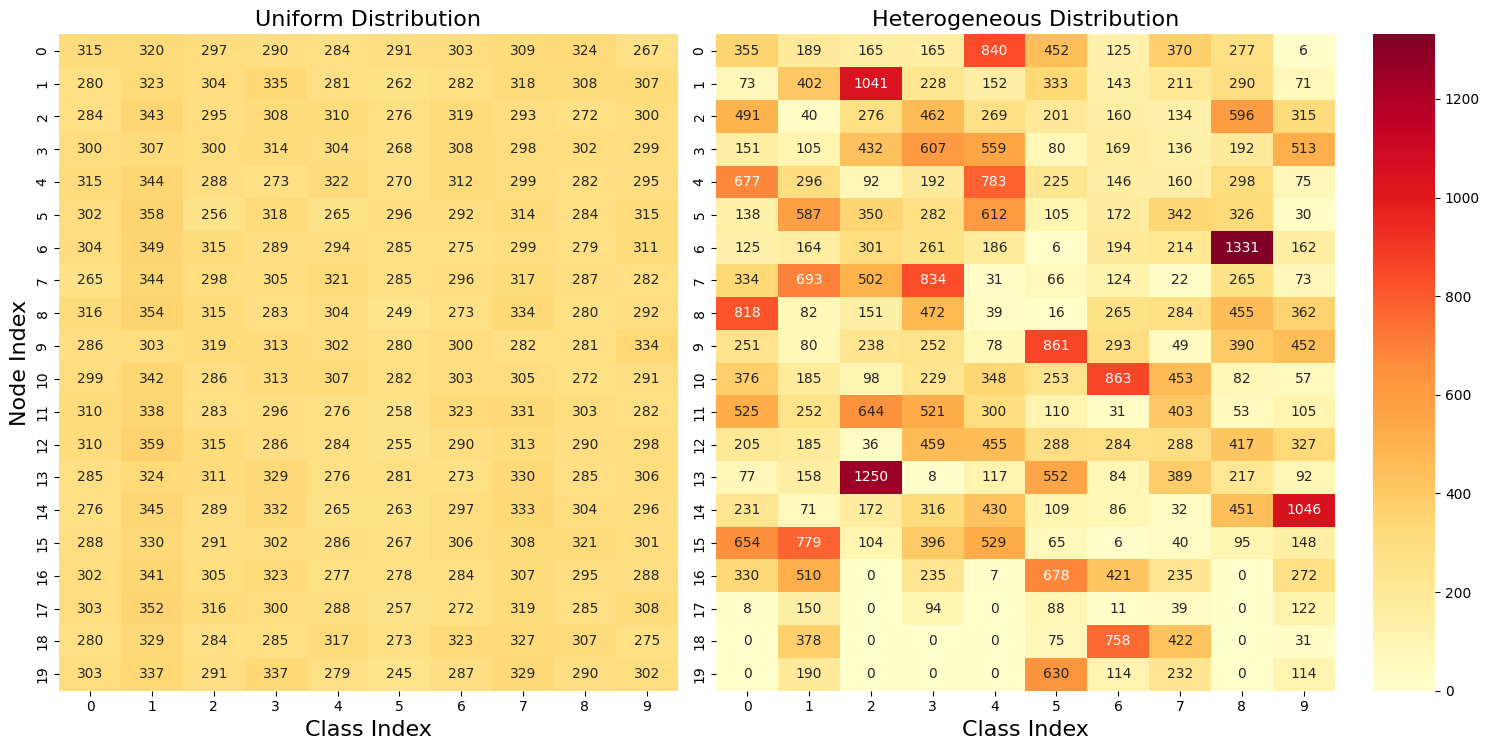

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# 1. Determine the global min and max counts for consistent color scaling
vmin = 0 # Assuming counts cannot be negative
vmax = max(np.max(class_counts1) if class_counts1.size > 0 else 0,
           np.max(class_counts2) if class_counts2.size > 0 else 0)

# 2. Create figure and gridspec layout
fig = plt.figure(figsize=(15, 8))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.1])  # 两个热图宽度相等，第3列为颜色条

# 3. Create axes for heatmaps and colorbar
ax1 = plt.subplot(gs[0])  # 左图
ax2 = plt.subplot(gs[1], sharey=ax1)  # 右图，与左图共享y轴
cbar_ax = plt.subplot(gs[2])  # 颜色条专用轴

# 4. Plot the first heatmap (left subplot) - NO color bar
sns.heatmap(class_counts1,
            annot=True,       # Show numbers in cells
            fmt='.0f',        # Format numbers as integers
            cmap='YlOrRd',    # Colormap (choose one you like)
            ax=ax1,           # Target the left axis
            vmin=vmin,        # Set min color scale
            vmax=vmax,        # Set max color scale
            cbar=False)       # IMPORTANT: Disable color bar for this plot
ax1.set_title('Uniform Distribution', fontsize=16)
ax1.set_ylabel('Node Index', fontsize=16)
ax1.set_xlabel('Class Index', fontsize=16)

# 5. Plot the second heatmap (right subplot) - WITH color bar
sns.heatmap(class_counts2,
            annot=True,
            fmt='.0f',
            cmap='YlOrRd',
            ax=ax2,
            vmin=vmin,
            vmax=vmax,
            cbar=True,
            cbar_ax=cbar_ax,  # 指定颜色条绘制在独立的轴上
            #cbar_kws={'label': 'Number of Samples'}
            )  # 添加颜色条标签
ax2.set_title('Heterogeneous Distribution', fontsize=16)
ax2.set_xlabel('Class Index', fontsize=16)

# 6. Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for suptitle

# 7. Save the plot to PDF (在 plt.show() 之前)
plt.savefig("heatmap(n=20).pdf", format='pdf', bbox_inches='tight')

# 8. Show the plot
plt.show()